# Latency Model for the RADOS Simulator
The latency model `latModel` has two components: one for converting request size into latency and another one to add compaction delays drawn from a heavy-tailed distribution (e.g. `random.lognormvariate(mu, sigma)`). See `scripts/radossim.py` for more details.

In [8]:
# Basic parameters
runs = 11

# latModel parameters (Fit those to an actual BlueStore deployment!)

# Log fitting for IO sizes > 64KB
lgMult = 820.28
lgAdd = -1114.3

# Linear fitting for IO sizes <= 64KB
smMult = 62.36
smAdd = 8.33

# Lognormal fitting to "In each second, at least 10 x 60ms are spent
# with the drive being blocked [skourtis:inflow13, Fig 4]"
# A rough example approximation would be an average around 10ms (i.e. 100 reqs/sec)
# with a 90%-tile around 60ms (so 10 of the 100 req/sec are at least 60ms)
# with the 99%-tile not too much higher. It all depends on the minimum throughput
mu = 9.9
sigma = 0.64

# Test for larger parameters
test_list = []


In [9]:
# Parameters
lgMult = 820.28
lgAdd = -1114.3
smMult = 62.36
smAdd = 8.33
mu = 6.0
sigma = 2.0


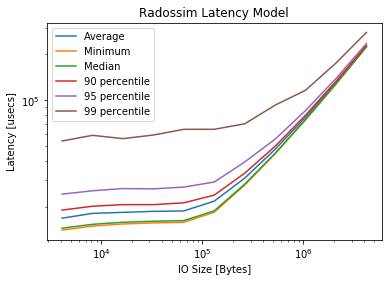

In [11]:
import matplotlib
import matplotlib.pyplot as plt

# Add path for modules in scripts/ so this notebook works
# without the context created by main.workflow
import sys
sys.path.append('../..')

import scripts.radossim as sim


x = []
y_min = []
y_avg = []
y_med = []
y_p90 = []
y_p95 = []
y_p99 = []
for i in range(runs):
    s = (2**i) * 4096
    x.append(s)
    msmts = []
    for j in range(10000):
        msmts.append(sim.latModel(s, lgMult, lgAdd, smMult, smAdd, mu, sigma))
    msmts.sort()
    avg = sum(msmts) / len(msmts)
    median = msmts[int(.5 * len(msmts))]
    pct90 = msmts[int(.90 * len(msmts))]
    pct95 = msmts[int(.95 * len(msmts))]
    pct99 = msmts[int(.99 * len(msmts))]
    y_min.append(msmts[0])
    y_avg.append(avg)
    y_med.append(median)
    y_p90.append(pct90)
    y_p95.append(pct95)
    y_p99.append(pct99)
    
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, y_avg, label='Average')
ax.plot(x, y_min, label='Minimum')
ax.plot(x, y_med, label='Median')
ax.plot(x, y_p90, label='90 percentile')
ax.plot(x, y_p95, label='95 percentile')
ax.plot(x, y_p99, label='99 percentile')
ax.set(xlabel='IO Size [Bytes]', ylabel='Latency [usecs]', title='Radossim Latency Model')

plt.legend()
plt.show()

MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./HDF/ks-test.hdf5`.
MainProcess pypet.storageservice.HDF5StorageService INFO     You specified ``overwrite_file=True``, so I deleted the file `./HDF/ks-test.hdf5`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `ks-test`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `ks-test`.
MainProcess pypet.environment.Environment INFO     
************************************************************
STARTING runs of trajectory
`ks-test`.
***********************************************************

minimum predicted latency: 219.774059
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3852, pvalue=0.0)


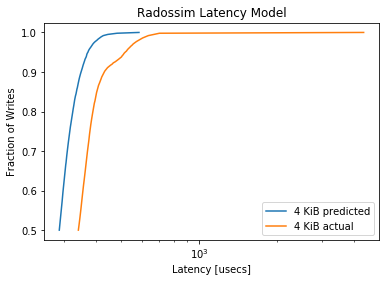

MainProcess pypet INFO     
 Finished single run #0 of 1680 

MainProcess pypet INFO     
 Starting single run #1 of 1680 



minimum predicted latency: 209.441491
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3341, pvalue=0.0)


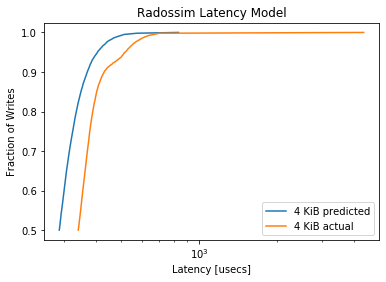

MainProcess pypet INFO     
 Finished single run #1 of 1680 

MainProcess pypet INFO     
 Starting single run #2 of 1680 



minimum predicted latency: 214.755657
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3246, pvalue=1e-323)


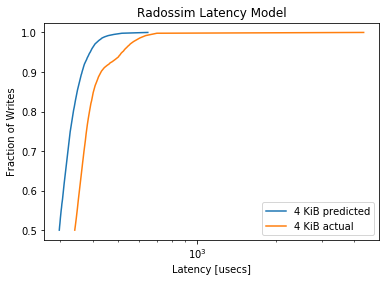

MainProcess pypet INFO     
 Finished single run #2 of 1680 

MainProcess pypet INFO     
 Starting single run #3 of 1680 



minimum predicted latency: 211.774550
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2749, pvalue=1e-323)


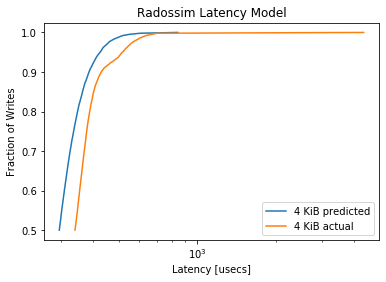

MainProcess pypet INFO     
 Finished single run #3 of 1680 

MainProcess pypet INFO     
 Starting single run #4 of 1680 



minimum predicted latency: 224.192112
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2429, pvalue=3.1450466280515753e-259)


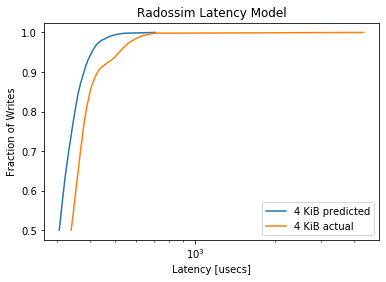

MainProcess pypet INFO     
 Finished single run #4 of 1680 

MainProcess pypet INFO     
 Starting single run #5 of 1680 



minimum predicted latency: 215.583959
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1959, pvalue=3.617567386094065e-168)


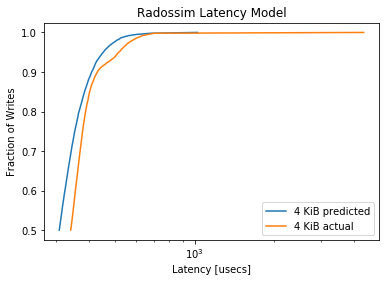

MainProcess pypet INFO     
 Finished single run #5 of 1680 

MainProcess pypet INFO     
 Starting single run #6 of 1680 



minimum predicted latency: 224.756231
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.167, pvalue=4.144003287490495e-122)


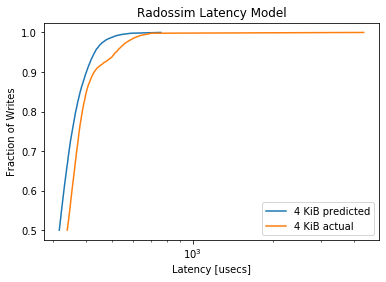

MainProcess pypet INFO     
 Finished single run #6 of 1680 

MainProcess pypet INFO     
 Starting single run #7 of 1680 



minimum predicted latency: 211.693534
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1435, pvalue=3.6732905134400605e-90)


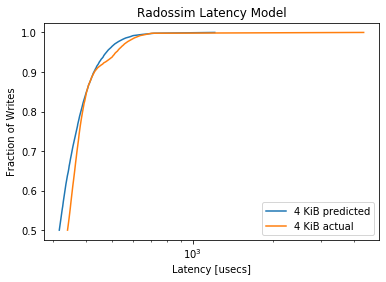

MainProcess pypet INFO     
 Finished single run #7 of 1680 

MainProcess pypet INFO     
 Starting single run #8 of 1680 



minimum predicted latency: 224.899773
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1093, pvalue=2.0744014768184268e-52)


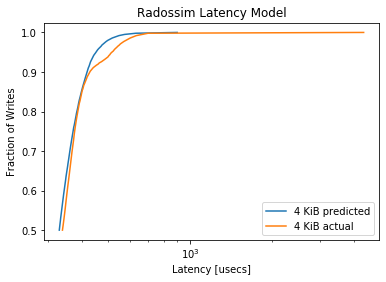

MainProcess pypet INFO     
 Finished single run #8 of 1680 

MainProcess pypet INFO     
 Starting single run #9 of 1680 



minimum predicted latency: 211.066455
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0631, pvalue=9.965303058483196e-18)


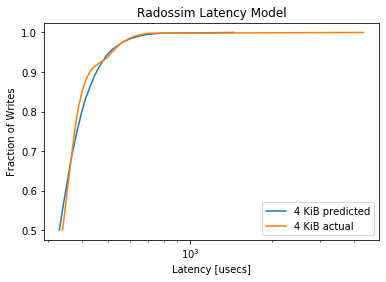

MainProcess pypet INFO     
 Finished single run #9 of 1680 

MainProcess pypet INFO     
 Starting single run #10 of 1680 



minimum predicted latency: 230.374893
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1678, pvalue=2.7746844590776557e-123)


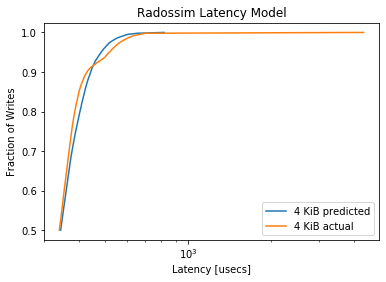

MainProcess pypet INFO     
 Finished single run #10 of 1680 

MainProcess pypet INFO     
 Starting single run #11 of 1680 



minimum predicted latency: 216.061498
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1145, pvalue=1.7447624645457204e-57)


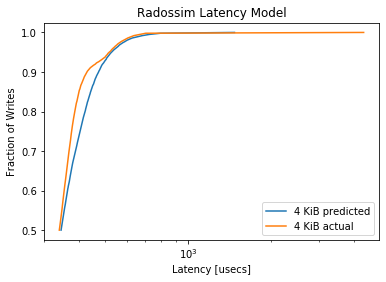

MainProcess pypet INFO     
 Finished single run #11 of 1680 

MainProcess pypet INFO     
 Starting single run #12 of 1680 



minimum predicted latency: 236.572723
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2303, pvalue=7.775940463053528e-233)


MainProcess pypet INFO     
 Finished single run #12 of 1680 

MainProcess pypet INFO     
 Starting single run #13 of 1680 



minimum predicted latency: 217.952491
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1816, pvalue=1.9339843353989674e-144)


MainProcess pypet INFO     
 Finished single run #13 of 1680 

MainProcess pypet INFO     
 Starting single run #14 of 1680 



minimum predicted latency: 236.489719
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2676, pvalue=3.144850127e-315)


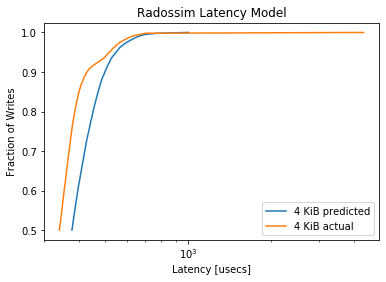

MainProcess pypet INFO     
 Finished single run #14 of 1680 

MainProcess pypet INFO     
 Starting single run #15 of 1680 



minimum predicted latency: 224.327454
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2668, pvalue=2.51407209636e-313)


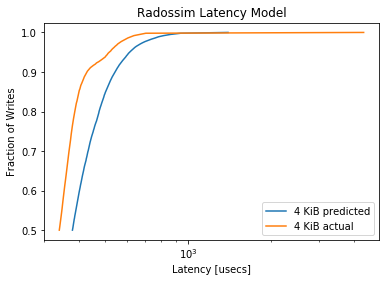

MainProcess pypet INFO     
 Finished single run #15 of 1680 

MainProcess pypet INFO     
 Starting single run #16 of 1680 



minimum predicted latency: 228.322565
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3593, pvalue=0.0)


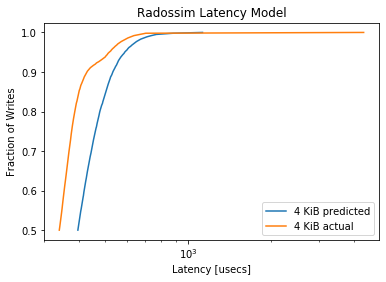

MainProcess pypet INFO     
 Finished single run #16 of 1680 

MainProcess pypet INFO     
 Starting single run #17 of 1680 



minimum predicted latency: 231.511403
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3353, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #17 of 1680 

MainProcess pypet INFO     
 Starting single run #18 of 1680 



minimum predicted latency: 251.257380
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4473, pvalue=0.0)


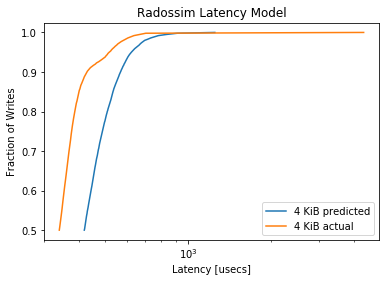

MainProcess pypet INFO     
 Finished single run #18 of 1680 

MainProcess pypet INFO     
 Starting single run #19 of 1680 



minimum predicted latency: 226.094619
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4137, pvalue=0.0)


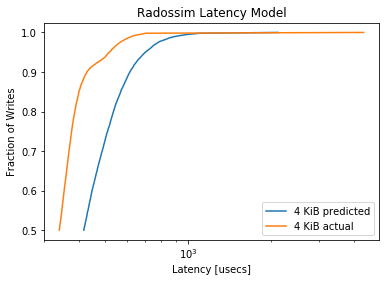

MainProcess pypet INFO     
 Finished single run #19 of 1680 

MainProcess pypet INFO     
 Starting single run #20 of 1680 



minimum predicted latency: 216.750660
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3905, pvalue=0.0)


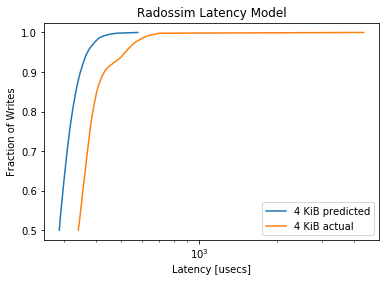

MainProcess pypet INFO     
 Finished single run #20 of 1680 

MainProcess pypet INFO     
 Starting single run #21 of 1680 



minimum predicted latency: 212.088014
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.338, pvalue=0.0)


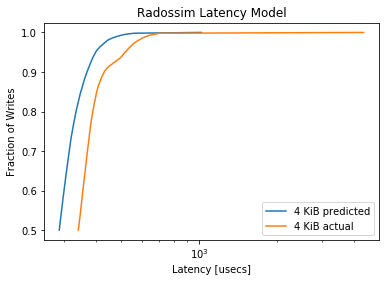

MainProcess pypet INFO     
 Finished single run #21 of 1680 

MainProcess pypet INFO     
 Starting single run #22 of 1680 



minimum predicted latency: 218.558558
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3214, pvalue=1e-323)


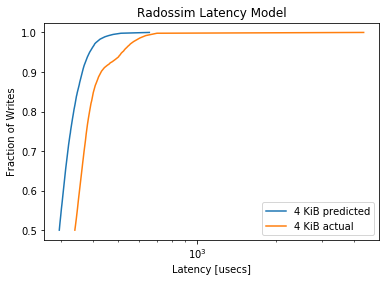

MainProcess pypet INFO     
 Finished single run #22 of 1680 

MainProcess pypet INFO     
 Starting single run #23 of 1680 



minimum predicted latency: 213.502115
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2719, pvalue=1e-323)


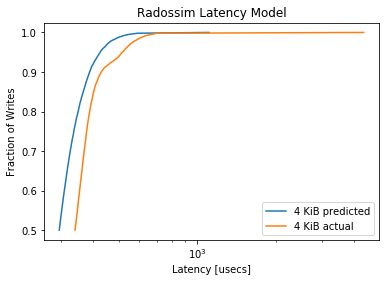

MainProcess pypet INFO     
 Finished single run #23 of 1680 

MainProcess pypet INFO     
 Starting single run #24 of 1680 



minimum predicted latency: 221.708356
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2464, pvalue=8.06396603809519e-267)


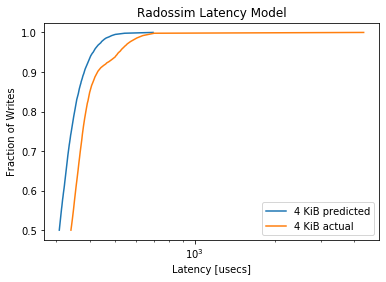

MainProcess pypet INFO     
 Finished single run #24 of 1680 

MainProcess pypet INFO     
 Starting single run #25 of 1680 



minimum predicted latency: 214.316001
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2085, pvalue=1.3207871875523273e-190)


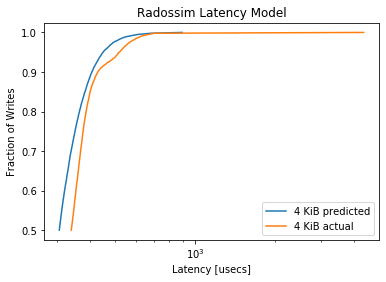

MainProcess pypet INFO     
 Finished single run #25 of 1680 

MainProcess pypet INFO     
 Starting single run #26 of 1680 



minimum predicted latency: 227.141681
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1606, pvalue=6.387769341929005e-113)


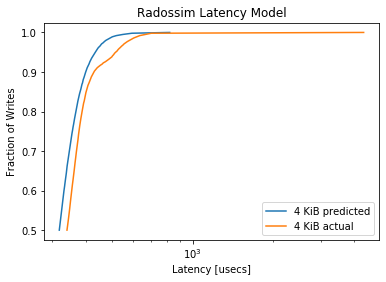

MainProcess pypet INFO     
 Finished single run #26 of 1680 

MainProcess pypet INFO     
 Starting single run #27 of 1680 



minimum predicted latency: 214.339533
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1241, pvalue=1.7651659466444193e-67)


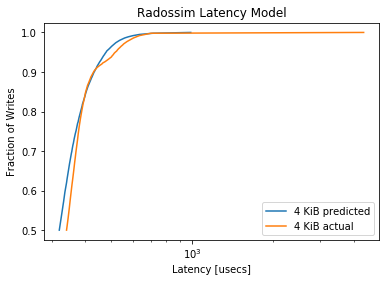

MainProcess pypet INFO     
 Finished single run #27 of 1680 

MainProcess pypet INFO     
 Starting single run #28 of 1680 



minimum predicted latency: 227.893374
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1094, pvalue=1.6654672754661733e-52)


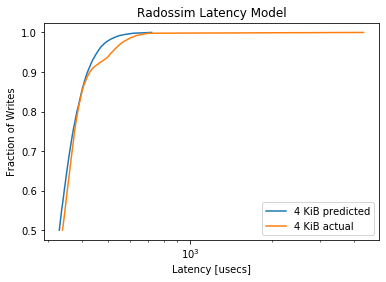

MainProcess pypet INFO     
 Finished single run #28 of 1680 

MainProcess pypet INFO     
 Starting single run #29 of 1680 



minimum predicted latency: 217.055042
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0623, pvalue=2.7209788942117734e-17)


MainProcess pypet INFO     
 Finished single run #29 of 1680 

MainProcess pypet INFO     
 Starting single run #30 of 1680 



minimum predicted latency: 221.982398
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1727, pvalue=1.3376216259387205e-130)


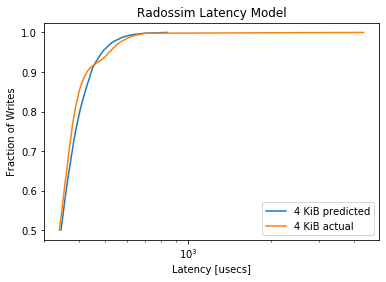

MainProcess pypet INFO     
 Finished single run #30 of 1680 

MainProcess pypet INFO     
 Starting single run #31 of 1680 



minimum predicted latency: 215.837658
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1117, pvalue=1.0094053993118584e-54)


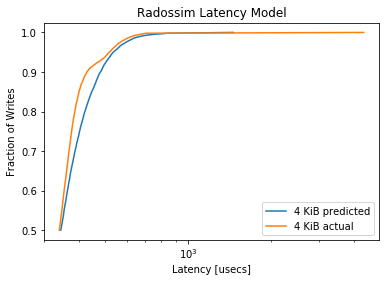

MainProcess pypet INFO     
 Finished single run #31 of 1680 

MainProcess pypet INFO     
 Starting single run #32 of 1680 



minimum predicted latency: 229.726666
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2293, pvalue=8.374473160598733e-231)


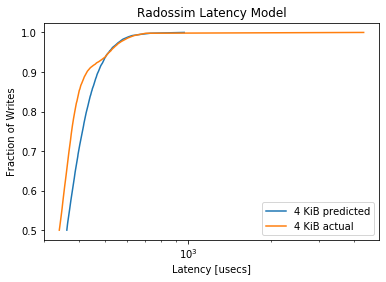

MainProcess pypet INFO     
 Finished single run #32 of 1680 

MainProcess pypet INFO     
 Starting single run #33 of 1680 



minimum predicted latency: 217.592643
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1918, pvalue=3.547795315220964e-161)


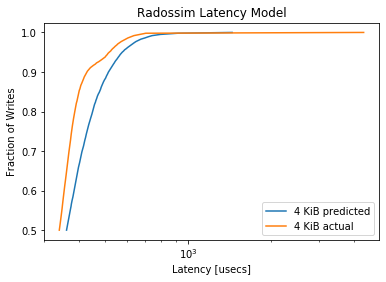

MainProcess pypet INFO     
 Finished single run #33 of 1680 

MainProcess pypet INFO     
 Starting single run #34 of 1680 



minimum predicted latency: 236.170384
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2716, pvalue=1e-323)


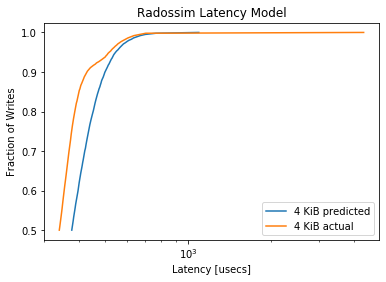

MainProcess pypet INFO     
 Finished single run #34 of 1680 

MainProcess pypet INFO     
 Starting single run #35 of 1680 



minimum predicted latency: 225.183356
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2596, pvalue=1.804660687969792e-296)


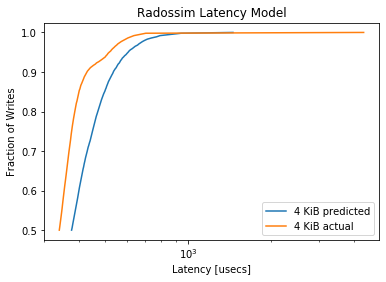

MainProcess pypet INFO     
 Finished single run #35 of 1680 

MainProcess pypet INFO     
 Starting single run #36 of 1680 



minimum predicted latency: 243.376954
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3566, pvalue=0.0)


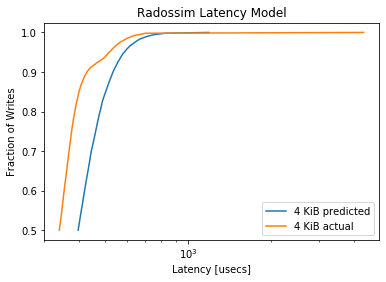

MainProcess pypet INFO     
 Finished single run #36 of 1680 

MainProcess pypet INFO     
 Starting single run #37 of 1680 



minimum predicted latency: 231.209115
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3375, pvalue=0.0)


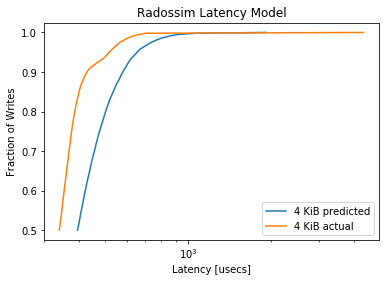

MainProcess pypet INFO     
 Finished single run #37 of 1680 

MainProcess pypet INFO     
 Starting single run #38 of 1680 



minimum predicted latency: 248.845604
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4441, pvalue=0.0)


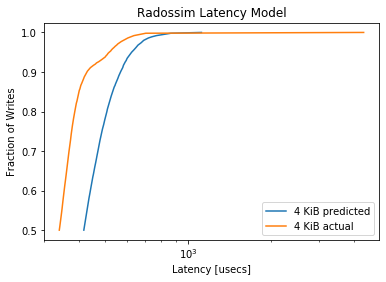

MainProcess pypet INFO     
 Finished single run #38 of 1680 

MainProcess pypet INFO     
 Starting single run #39 of 1680 



minimum predicted latency: 227.311909
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4252, pvalue=0.0)


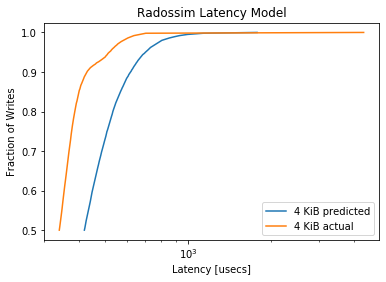

MainProcess pypet INFO     
 Finished single run #39 of 1680 

MainProcess pypet INFO     
 Starting single run #40 of 1680 



minimum predicted latency: 215.369517
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3979, pvalue=0.0)


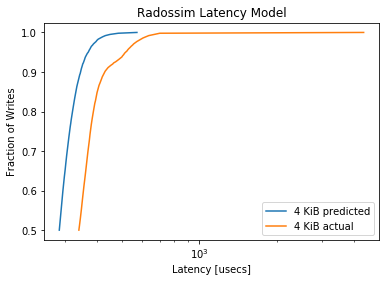

MainProcess pypet INFO     
 Finished single run #40 of 1680 

MainProcess pypet INFO     
 Starting single run #41 of 1680 



minimum predicted latency: 208.622814
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.346, pvalue=0.0)


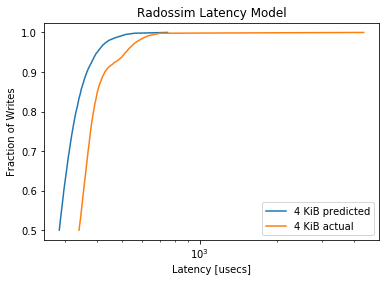

MainProcess pypet INFO     
 Finished single run #41 of 1680 

MainProcess pypet INFO     
 Starting single run #42 of 1680 



minimum predicted latency: 219.285145
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3251, pvalue=1e-323)


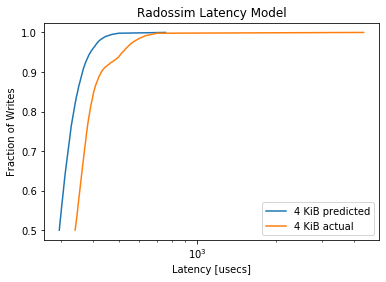

MainProcess pypet INFO     
 Finished single run #42 of 1680 

MainProcess pypet INFO     
 Starting single run #43 of 1680 



minimum predicted latency: 210.589263
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2846, pvalue=1e-323)


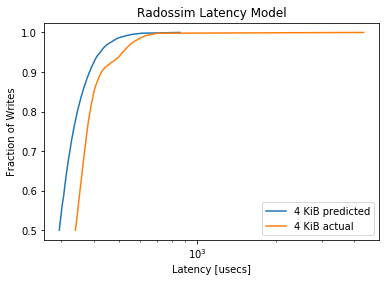

MainProcess pypet INFO     
 Finished single run #43 of 1680 

MainProcess pypet INFO     
 Starting single run #44 of 1680 



minimum predicted latency: 222.854094
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2483, pvalue=5.473368026943985e-271)


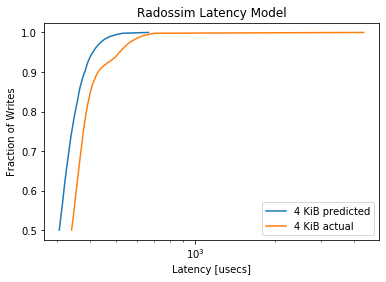

MainProcess pypet INFO     
 Finished single run #44 of 1680 

MainProcess pypet INFO     
 Starting single run #45 of 1680 



minimum predicted latency: 208.330936
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2147, pvalue=3.559631593285318e-202)


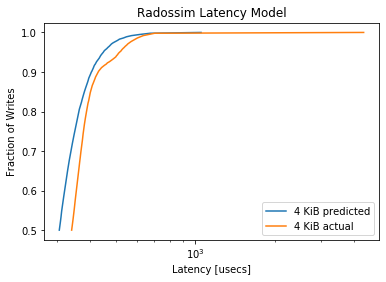

MainProcess pypet INFO     
 Finished single run #45 of 1680 

MainProcess pypet INFO     
 Starting single run #46 of 1680 



minimum predicted latency: 221.295891
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1706, pvalue=1.942842673251215e-127)


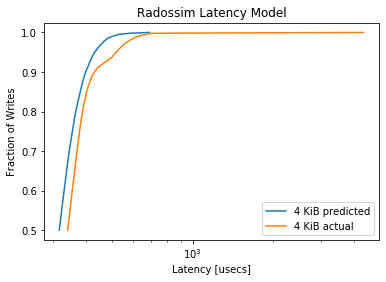

MainProcess pypet INFO     
 Finished single run #46 of 1680 

MainProcess pypet INFO     
 Starting single run #47 of 1680 



minimum predicted latency: 212.663288
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1356, pvalue=1.5967273615237926e-80)


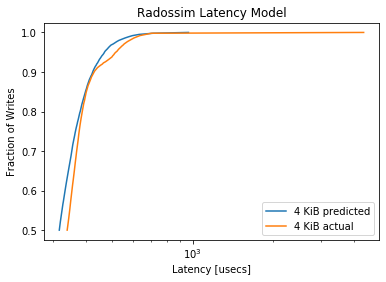

MainProcess pypet INFO     
 Finished single run #47 of 1680 

MainProcess pypet INFO     
 Starting single run #48 of 1680 



minimum predicted latency: 220.551710
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0988, pvalue=6.926660787212929e-43)


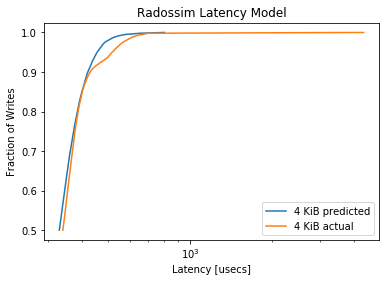

MainProcess pypet INFO     
 Finished single run #48 of 1680 

MainProcess pypet INFO     
 Starting single run #49 of 1680 



minimum predicted latency: 219.861774
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0552, pvalue=1.153021865986282e-13)


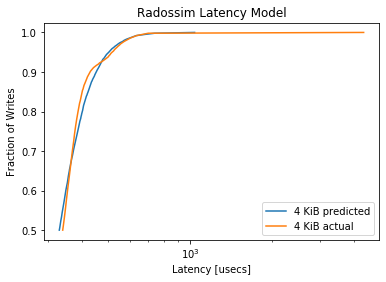

MainProcess pypet INFO     
 Finished single run #49 of 1680 

MainProcess pypet INFO     
 Starting single run #50 of 1680 



minimum predicted latency: 227.208980
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1678, pvalue=2.7746844590776557e-123)


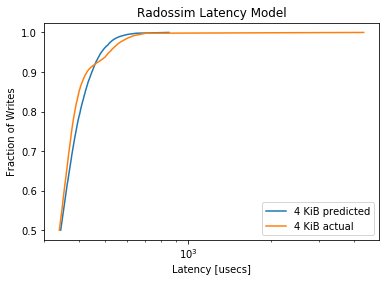

MainProcess pypet INFO     
 Finished single run #50 of 1680 

MainProcess pypet INFO     
 Starting single run #51 of 1680 



minimum predicted latency: 219.064068
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1168, pvalue=8.338063235579694e-60)


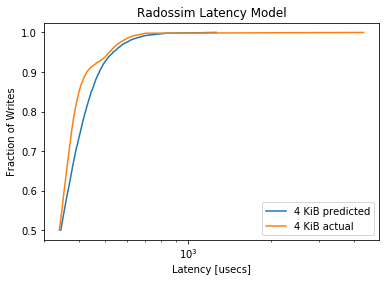

MainProcess pypet INFO     
 Finished single run #51 of 1680 

MainProcess pypet INFO     
 Starting single run #52 of 1680 



minimum predicted latency: 225.859602
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2211, pvalue=1.744364554875705e-214)


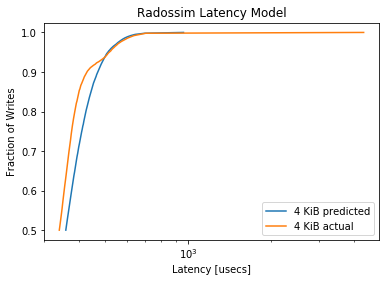

MainProcess pypet INFO     
 Finished single run #52 of 1680 

MainProcess pypet INFO     
 Starting single run #53 of 1680 



minimum predicted latency: 217.743140
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1789, pvalue=3.6319261251659797e-140)


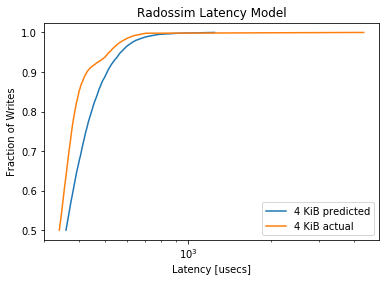

MainProcess pypet INFO     
 Finished single run #53 of 1680 

MainProcess pypet INFO     
 Starting single run #54 of 1680 



minimum predicted latency: 238.159966
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2663, pvalue=3.859886924884e-312)


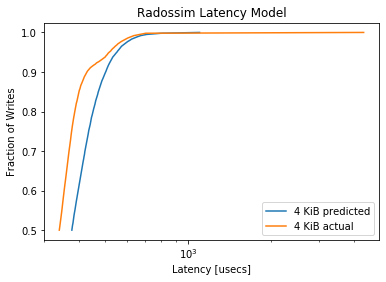

MainProcess pypet INFO     
 Finished single run #54 of 1680 

MainProcess pypet INFO     
 Starting single run #55 of 1680 



minimum predicted latency: 223.887521
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.266, pvalue=1.9823067146067e-311)


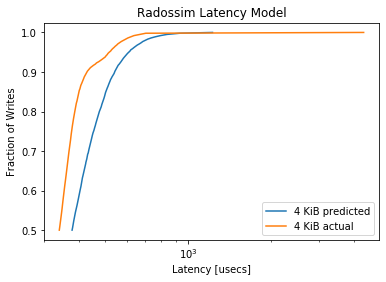

MainProcess pypet INFO     
 Finished single run #55 of 1680 

MainProcess pypet INFO     
 Starting single run #56 of 1680 



minimum predicted latency: 238.940535
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3465, pvalue=0.0)


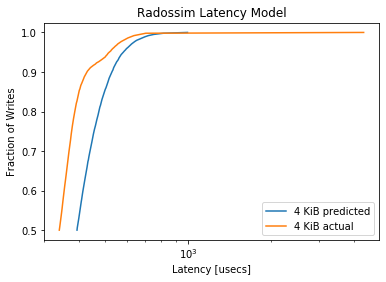

MainProcess pypet INFO     
 Finished single run #56 of 1680 

MainProcess pypet INFO     
 Starting single run #57 of 1680 



minimum predicted latency: 227.253993
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3362, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #57 of 1680 

MainProcess pypet INFO     
 Starting single run #58 of 1680 



minimum predicted latency: 250.675677
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4515, pvalue=0.0)


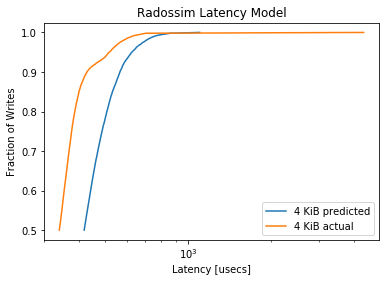

MainProcess pypet INFO     
 Finished single run #58 of 1680 

MainProcess pypet INFO     
 Starting single run #59 of 1680 



minimum predicted latency: 232.475378
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4216, pvalue=0.0)


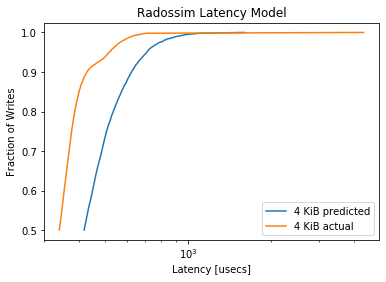

MainProcess pypet INFO     
 Finished single run #59 of 1680 

MainProcess pypet INFO     
 Starting single run #60 of 1680 



minimum predicted latency: 213.502611
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3972, pvalue=0.0)


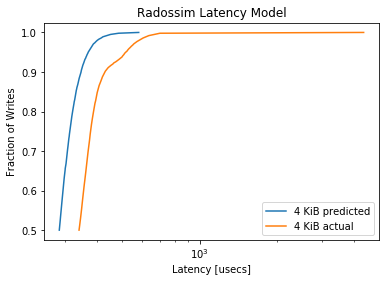

MainProcess pypet INFO     
 Finished single run #60 of 1680 

MainProcess pypet INFO     
 Starting single run #61 of 1680 



minimum predicted latency: 209.182626
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3397, pvalue=0.0)


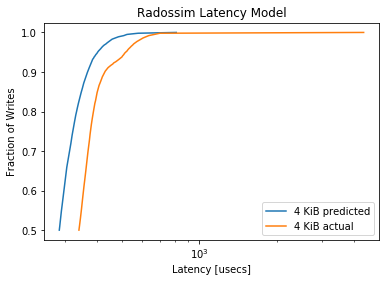

MainProcess pypet INFO     
 Finished single run #61 of 1680 

MainProcess pypet INFO     
 Starting single run #62 of 1680 



minimum predicted latency: 214.647248
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3239, pvalue=1e-323)


MainProcess pypet INFO     
 Finished single run #62 of 1680 

MainProcess pypet INFO     
 Starting single run #63 of 1680 



minimum predicted latency: 208.467817
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2862, pvalue=1e-323)


MainProcess pypet INFO     
 Finished single run #63 of 1680 

MainProcess pypet INFO     
 Starting single run #64 of 1680 



minimum predicted latency: 213.918142
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2564, pvalue=3.916282554464941e-289)


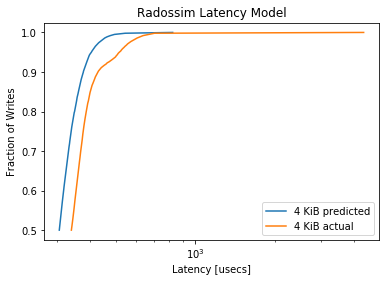

MainProcess pypet INFO     
 Finished single run #64 of 1680 

MainProcess pypet INFO     
 Starting single run #65 of 1680 



minimum predicted latency: 216.413129
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2093, pvalue=4.44259482777169e-192)


MainProcess pypet INFO     
 Finished single run #65 of 1680 

MainProcess pypet INFO     
 Starting single run #66 of 1680 



minimum predicted latency: 219.422268
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1767, pvalue=9.86353874534622e-137)


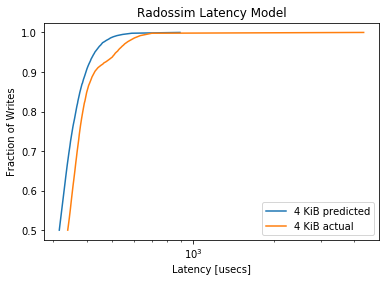

MainProcess pypet INFO     
 Finished single run #66 of 1680 

MainProcess pypet INFO     
 Starting single run #67 of 1680 



minimum predicted latency: 209.094941
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1412, pvalue=2.680159379482131e-87)


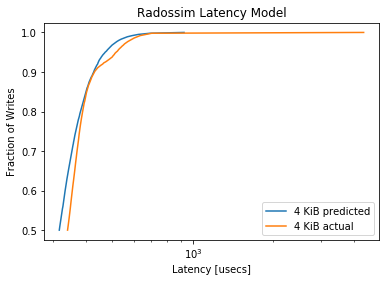

MainProcess pypet INFO     
 Finished single run #67 of 1680 

MainProcess pypet INFO     
 Starting single run #68 of 1680 



minimum predicted latency: 220.776224
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.103, pvalue=1.4035555941391563e-46)


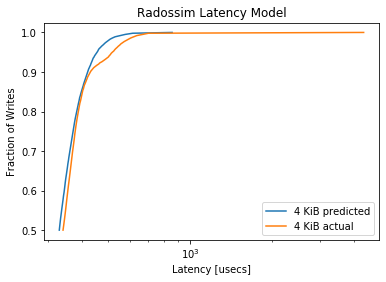

MainProcess pypet INFO     
 Finished single run #68 of 1680 

MainProcess pypet INFO     
 Starting single run #69 of 1680 



minimum predicted latency: 215.327799
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.064, pvalue=3.1699729390105597e-18)


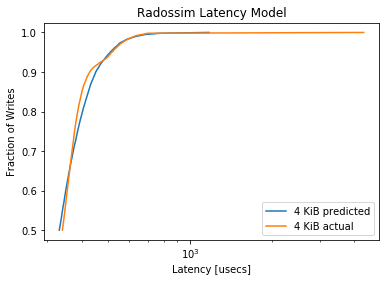

MainProcess pypet INFO     
 Finished single run #69 of 1680 

MainProcess pypet INFO     
 Starting single run #70 of 1680 



minimum predicted latency: 226.092438
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.166, pvalue=1.1943654701072106e-120)


MainProcess pypet INFO     
 Finished single run #70 of 1680 

MainProcess pypet INFO     
 Starting single run #71 of 1680 



minimum predicted latency: 224.034487
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1157, pvalue=1.0883322566822057e-58)


MainProcess pypet INFO     
 Finished single run #71 of 1680 

MainProcess pypet INFO     
 Starting single run #72 of 1680 



minimum predicted latency: 234.108618
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2221, pvalue=1.9252020446328844e-216)


MainProcess pypet INFO     
 Finished single run #72 of 1680 

MainProcess pypet INFO     
 Starting single run #73 of 1680 



minimum predicted latency: 224.880695
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1756, pvalue=4.951152787297715e-135)


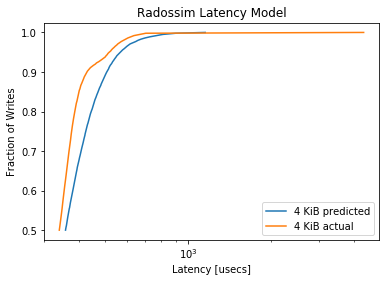

MainProcess pypet INFO     
 Finished single run #73 of 1680 

MainProcess pypet INFO     
 Starting single run #74 of 1680 



minimum predicted latency: 235.094401
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2645, pvalue=6.879185245291027e-308)


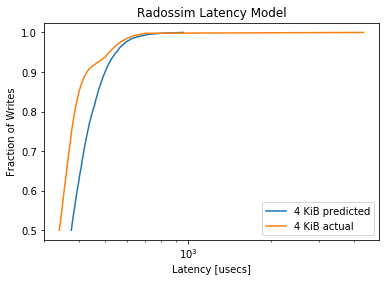

MainProcess pypet INFO     
 Finished single run #74 of 1680 

MainProcess pypet INFO     
 Starting single run #75 of 1680 



minimum predicted latency: 225.683127
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2451, pvalue=5.486608534368436e-264)


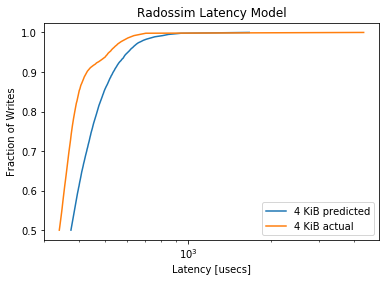

MainProcess pypet INFO     
 Finished single run #75 of 1680 

MainProcess pypet INFO     
 Starting single run #76 of 1680 



minimum predicted latency: 248.930585
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3516, pvalue=0.0)


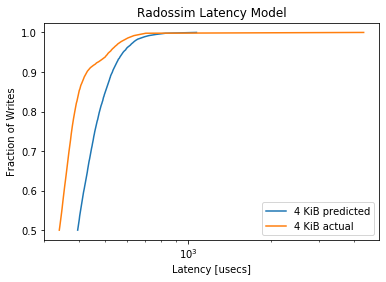

MainProcess pypet INFO     
 Finished single run #76 of 1680 

MainProcess pypet INFO     
 Starting single run #77 of 1680 



minimum predicted latency: 224.725915
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3478, pvalue=0.0)


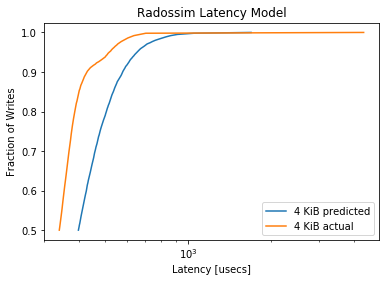

MainProcess pypet INFO     
 Finished single run #77 of 1680 

MainProcess pypet INFO     
 Starting single run #78 of 1680 



minimum predicted latency: 245.119218
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4429, pvalue=0.0)


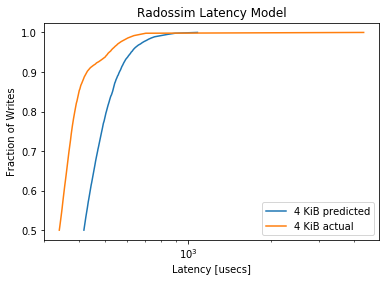

MainProcess pypet INFO     
 Finished single run #78 of 1680 

MainProcess pypet INFO     
 Starting single run #79 of 1680 



minimum predicted latency: 225.659995
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4264, pvalue=0.0)


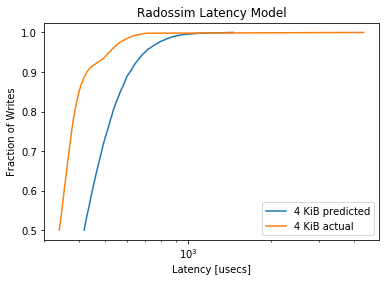

MainProcess pypet INFO     
 Finished single run #79 of 1680 

MainProcess pypet INFO     
 Starting single run #80 of 1680 



minimum predicted latency: 212.395214
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3914, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #80 of 1680 

MainProcess pypet INFO     
 Starting single run #81 of 1680 



minimum predicted latency: 210.665272
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3388, pvalue=0.0)


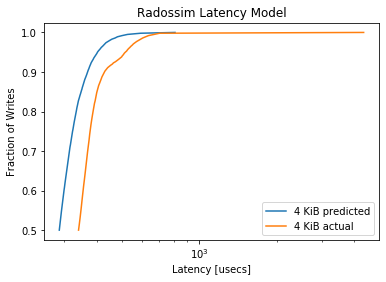

MainProcess pypet INFO     
 Finished single run #81 of 1680 

MainProcess pypet INFO     
 Starting single run #82 of 1680 



minimum predicted latency: 218.347574
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3312, pvalue=1e-323)


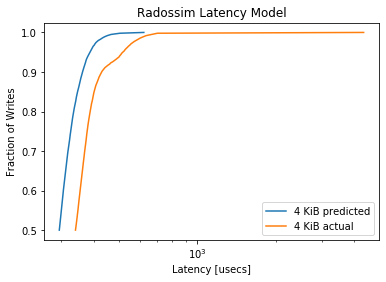

MainProcess pypet INFO     
 Finished single run #82 of 1680 

MainProcess pypet INFO     
 Starting single run #83 of 1680 



minimum predicted latency: 212.108338
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2776, pvalue=1e-323)


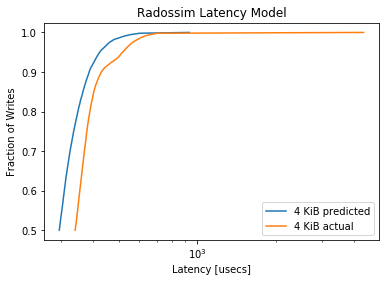

MainProcess pypet INFO     
 Finished single run #83 of 1680 

MainProcess pypet INFO     PROGRESS: Finished   84/1680 runs [=                   ]  5.0%, remaining: 0:10:29
MainProcess pypet INFO     
 Starting single run #84 of 1680 



minimum predicted latency: 218.201564
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2549, pvalue=9.978555485603584e-286)


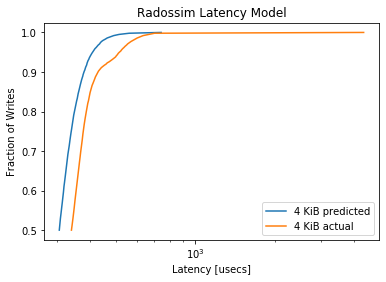

MainProcess pypet INFO     
 Finished single run #84 of 1680 

MainProcess pypet INFO     
 Starting single run #85 of 1680 



minimum predicted latency: 211.899435
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2059, pvalue=7.389184193980713e-186)


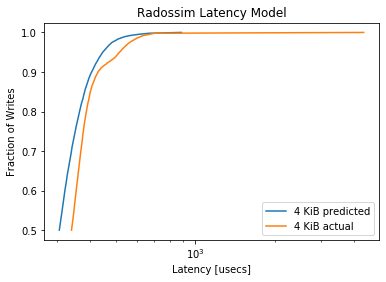

MainProcess pypet INFO     
 Finished single run #85 of 1680 

MainProcess pypet INFO     
 Starting single run #86 of 1680 



minimum predicted latency: 224.682194
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1693, pvalue=1.6832892164751832e-125)


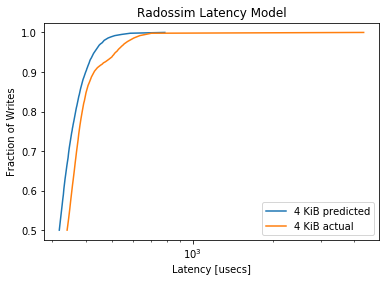

MainProcess pypet INFO     
 Finished single run #86 of 1680 

MainProcess pypet INFO     
 Starting single run #87 of 1680 



minimum predicted latency: 214.288282
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1376, pvalue=6.537906413524933e-83)


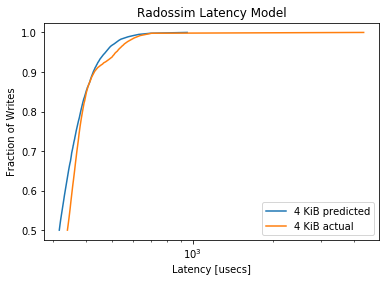

MainProcess pypet INFO     
 Finished single run #87 of 1680 

MainProcess pypet INFO     
 Starting single run #88 of 1680 



minimum predicted latency: 229.435808
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1092, pvalue=2.5832213271606204e-52)


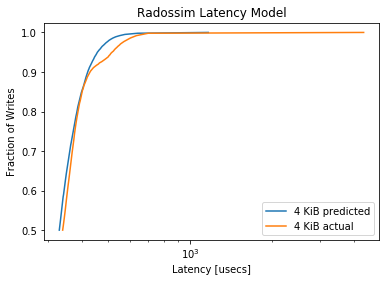

MainProcess pypet INFO     
 Finished single run #88 of 1680 

MainProcess pypet INFO     
 Starting single run #89 of 1680 



minimum predicted latency: 215.291364
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0685, pvalue=8.089130963316147e-21)


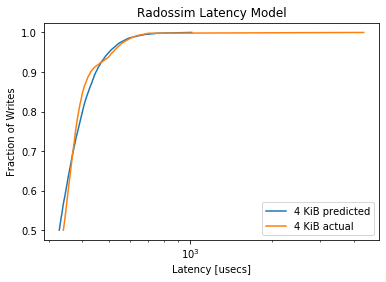

MainProcess pypet INFO     
 Finished single run #89 of 1680 

MainProcess pypet INFO     
 Starting single run #90 of 1680 



minimum predicted latency: 230.724635
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1678, pvalue=2.7746844590776557e-123)


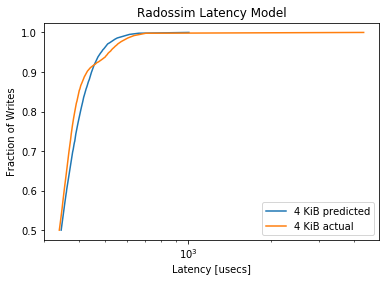

MainProcess pypet INFO     
 Finished single run #90 of 1680 

MainProcess pypet INFO     
 Starting single run #91 of 1680 



minimum predicted latency: 211.304421
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1168, pvalue=8.338063235579694e-60)


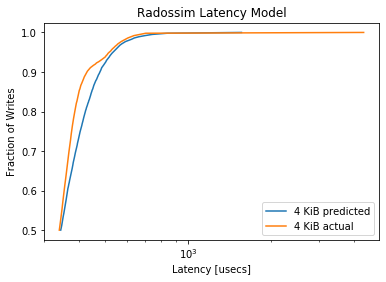

MainProcess pypet INFO     
 Finished single run #91 of 1680 

MainProcess pypet INFO     
 Starting single run #92 of 1680 



minimum predicted latency: 235.155437
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2184, pvalue=3.0225277821507194e-209)


MainProcess pypet INFO     
 Finished single run #92 of 1680 

MainProcess pypet INFO     
 Starting single run #93 of 1680 



minimum predicted latency: 222.419211
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.183, pvalue=1.1083974705889038e-146)


MainProcess pypet INFO     
 Finished single run #93 of 1680 

MainProcess pypet INFO     
 Starting single run #94 of 1680 



minimum predicted latency: 231.480683
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2688, pvalue=4.28752e-318)


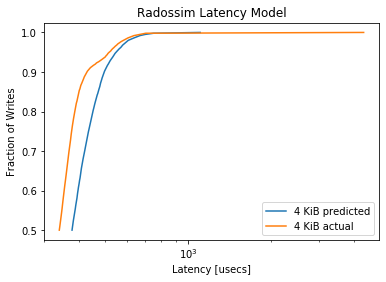

MainProcess pypet INFO     
 Finished single run #94 of 1680 

MainProcess pypet INFO     
 Starting single run #95 of 1680 



minimum predicted latency: 220.128547
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2517, pvalue=1.5695776985128702e-278)


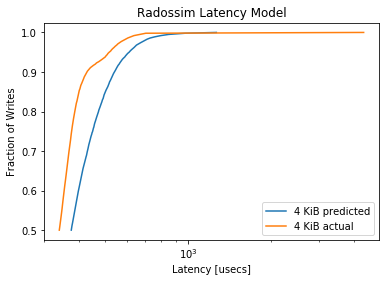

MainProcess pypet INFO     
 Finished single run #95 of 1680 

MainProcess pypet INFO     
 Starting single run #96 of 1680 



minimum predicted latency: 237.657911
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3491, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #96 of 1680 

MainProcess pypet INFO     
 Starting single run #97 of 1680 



minimum predicted latency: 222.132353
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3435, pvalue=0.0)


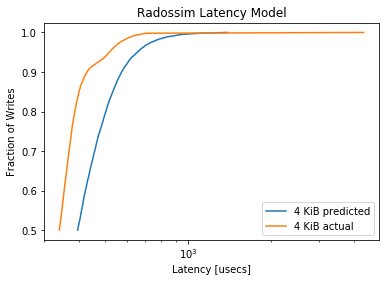

MainProcess pypet INFO     
 Finished single run #97 of 1680 

MainProcess pypet INFO     
 Starting single run #98 of 1680 



minimum predicted latency: 237.761058
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4381, pvalue=0.0)


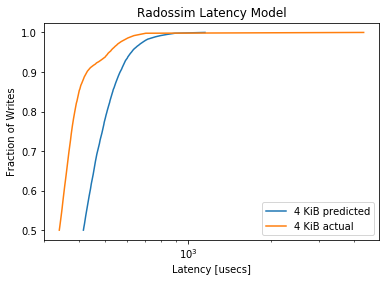

MainProcess pypet INFO     
 Finished single run #98 of 1680 

MainProcess pypet INFO     
 Starting single run #99 of 1680 



minimum predicted latency: 232.997585
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4062, pvalue=0.0)


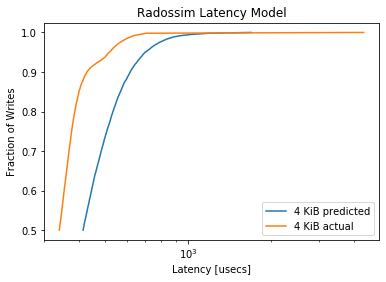

MainProcess pypet INFO     
 Finished single run #99 of 1680 

MainProcess pypet INFO     
 Starting single run #100 of 1680 



minimum predicted latency: 213.867465
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4019, pvalue=0.0)


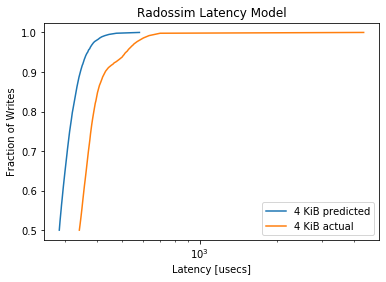

MainProcess pypet INFO     
 Finished single run #100 of 1680 

MainProcess pypet INFO     
 Starting single run #101 of 1680 



minimum predicted latency: 208.752108
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3501, pvalue=0.0)


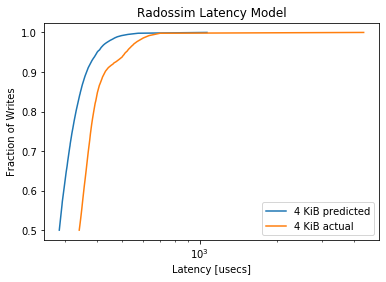

MainProcess pypet INFO     
 Finished single run #101 of 1680 

MainProcess pypet INFO     
 Starting single run #102 of 1680 



minimum predicted latency: 216.506715
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3363, pvalue=0.0)


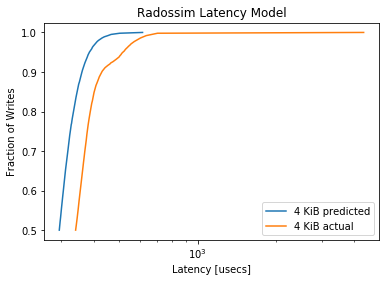

MainProcess pypet INFO     
 Finished single run #102 of 1680 

MainProcess pypet INFO     
 Starting single run #103 of 1680 



minimum predicted latency: 208.224226
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2831, pvalue=1e-323)


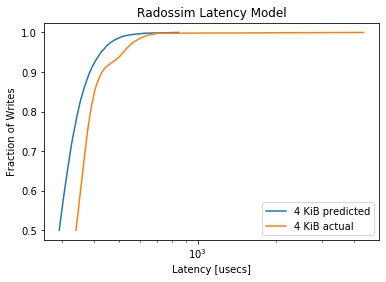

MainProcess pypet INFO     
 Finished single run #103 of 1680 

MainProcess pypet INFO     
 Starting single run #104 of 1680 



minimum predicted latency: 219.562656
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2663, pvalue=3.859886924884e-312)


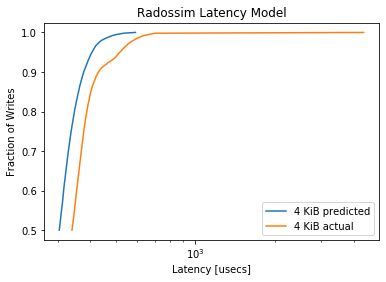

MainProcess pypet INFO     
 Finished single run #104 of 1680 

MainProcess pypet INFO     
 Starting single run #105 of 1680 



minimum predicted latency: 212.544966
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2163, pvalue=3.2282647063727514e-205)


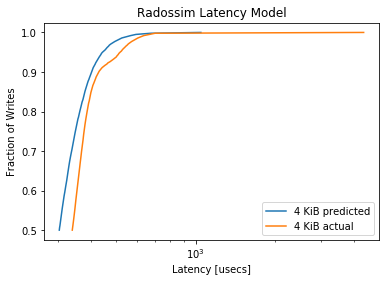

MainProcess pypet INFO     
 Finished single run #105 of 1680 

MainProcess pypet INFO     
 Starting single run #106 of 1680 



minimum predicted latency: 217.844550
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1722, pvalue=7.634755692616835e-130)


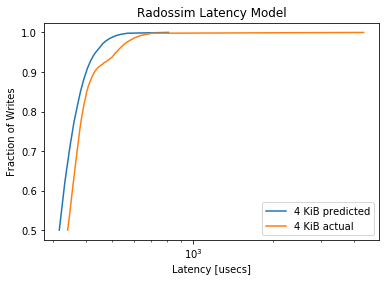

MainProcess pypet INFO     
 Finished single run #106 of 1680 

MainProcess pypet INFO     
 Starting single run #107 of 1680 



minimum predicted latency: 214.127140
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1417, pvalue=6.452610485455141e-88)


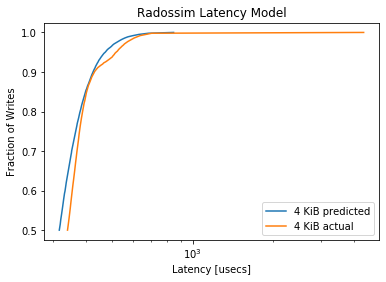

MainProcess pypet INFO     
 Finished single run #107 of 1680 

MainProcess pypet INFO     
 Starting single run #108 of 1680 



minimum predicted latency: 221.928997
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1002, pvalue=4.2327594385734197e-44)


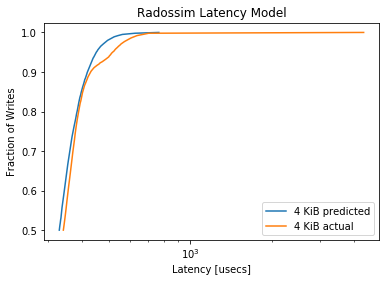

MainProcess pypet INFO     
 Finished single run #108 of 1680 

MainProcess pypet INFO     
 Starting single run #109 of 1680 



minimum predicted latency: 213.485794
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0675, pvalue=3.1580983558209366e-20)


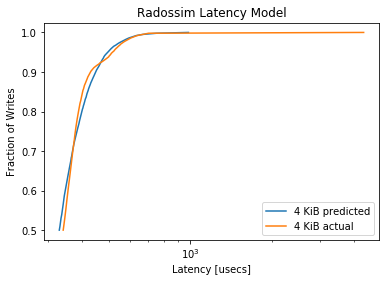

MainProcess pypet INFO     
 Finished single run #109 of 1680 

MainProcess pypet INFO     
 Starting single run #110 of 1680 



minimum predicted latency: 228.896917
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1689, pvalue=6.596903274052526e-125)


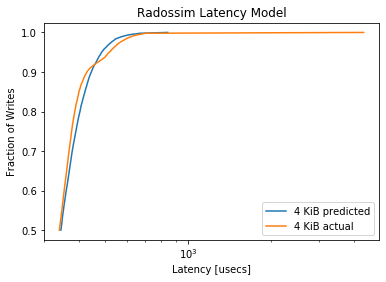

MainProcess pypet INFO     
 Finished single run #110 of 1680 

MainProcess pypet INFO     
 Starting single run #111 of 1680 



minimum predicted latency: 213.957915
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1098, pvalue=6.906057371123849e-53)


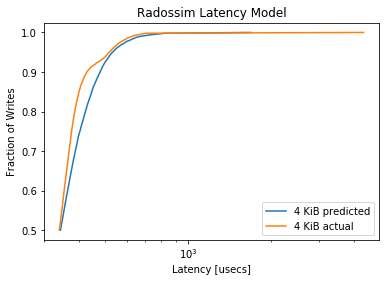

MainProcess pypet INFO     
 Finished single run #111 of 1680 

MainProcess pypet INFO     
 Starting single run #112 of 1680 



minimum predicted latency: 232.277331
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2159, pvalue=1.869667019440696e-204)


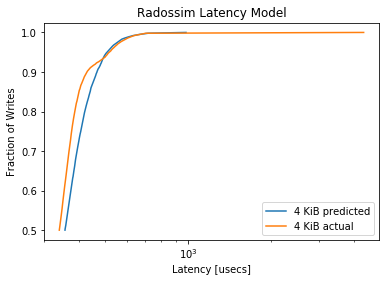

MainProcess pypet INFO     
 Finished single run #112 of 1680 

MainProcess pypet INFO     
 Starting single run #113 of 1680 



minimum predicted latency: 222.097428
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1822, pvalue=2.127433046037415e-145)


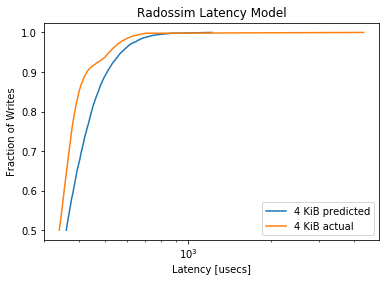

MainProcess pypet INFO     
 Finished single run #113 of 1680 

MainProcess pypet INFO     
 Starting single run #114 of 1680 



minimum predicted latency: 230.788288
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2675, pvalue=5.442200707e-315)


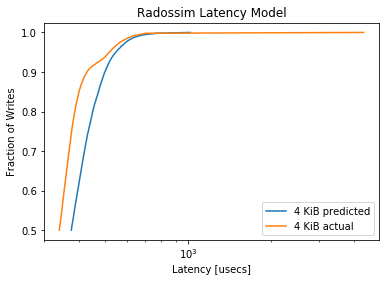

MainProcess pypet INFO     
 Finished single run #114 of 1680 

MainProcess pypet INFO     
 Starting single run #115 of 1680 



minimum predicted latency: 224.836677
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2627, pvalue=1.1435151398500023e-303)


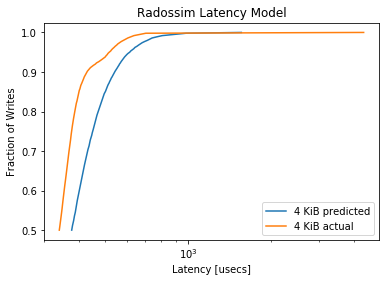

MainProcess pypet INFO     
 Finished single run #115 of 1680 

MainProcess pypet INFO     
 Starting single run #116 of 1680 



minimum predicted latency: 239.545926
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3393, pvalue=0.0)


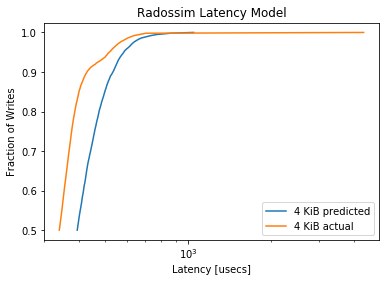

MainProcess pypet INFO     
 Finished single run #116 of 1680 

MainProcess pypet INFO     
 Starting single run #117 of 1680 



minimum predicted latency: 225.059043
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3389, pvalue=0.0)


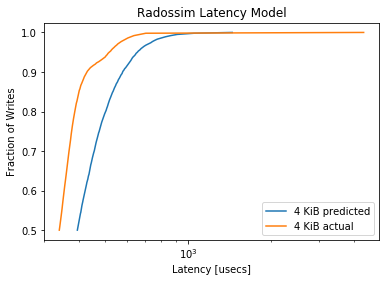

MainProcess pypet INFO     
 Finished single run #117 of 1680 

MainProcess pypet INFO     
 Starting single run #118 of 1680 



minimum predicted latency: 243.515439
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4442, pvalue=0.0)


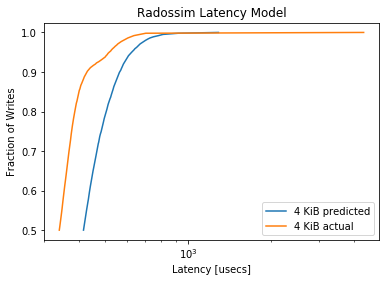

MainProcess pypet INFO     
 Finished single run #118 of 1680 

MainProcess pypet INFO     
 Starting single run #119 of 1680 



minimum predicted latency: 225.692535
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4133, pvalue=0.0)


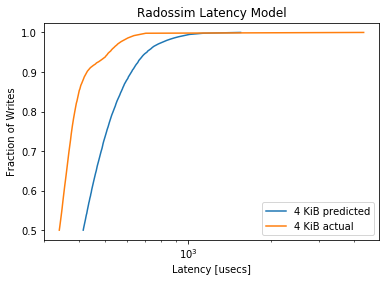

MainProcess pypet INFO     
 Finished single run #119 of 1680 

MainProcess pypet INFO     
 Starting single run #120 of 1680 



minimum predicted latency: 212.275318
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3933, pvalue=0.0)


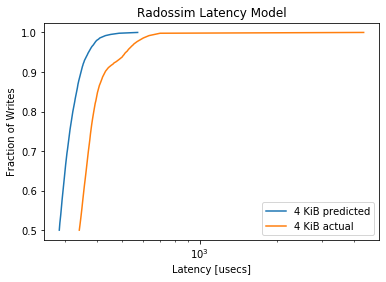

MainProcess pypet INFO     
 Finished single run #120 of 1680 

MainProcess pypet INFO     
 Starting single run #121 of 1680 



minimum predicted latency: 205.574884
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.338, pvalue=0.0)


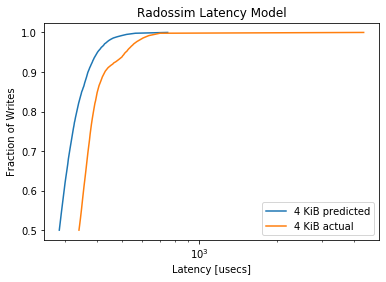

MainProcess pypet INFO     
 Finished single run #121 of 1680 

MainProcess pypet INFO     
 Starting single run #122 of 1680 



minimum predicted latency: 212.506165
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3417, pvalue=0.0)


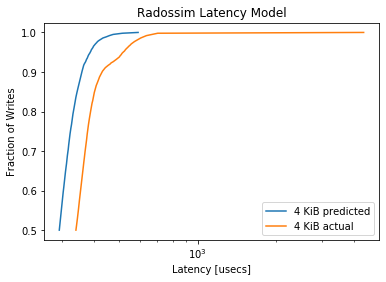

MainProcess pypet INFO     
 Finished single run #122 of 1680 

MainProcess pypet INFO     
 Starting single run #123 of 1680 



minimum predicted latency: 211.293358
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2858, pvalue=1e-323)


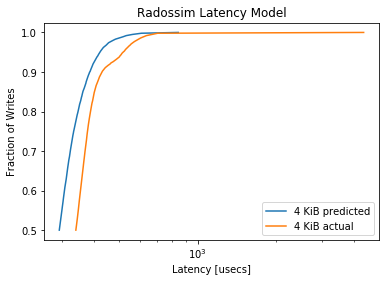

MainProcess pypet INFO     
 Finished single run #123 of 1680 

MainProcess pypet INFO     
 Starting single run #124 of 1680 



minimum predicted latency: 215.677892
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.261, pvalue=1.039221874850222e-299)


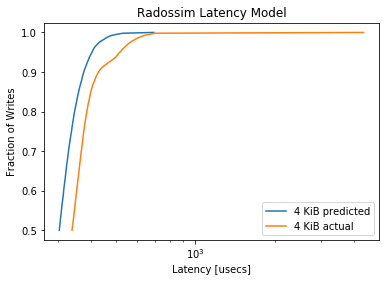

MainProcess pypet INFO     
 Finished single run #124 of 1680 

MainProcess pypet INFO     
 Starting single run #125 of 1680 



minimum predicted latency: 212.583619
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2138, pvalue=1.7886728303530644e-200)


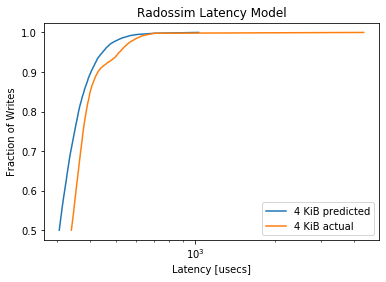

MainProcess pypet INFO     
 Finished single run #125 of 1680 

MainProcess pypet INFO     
 Starting single run #126 of 1680 



minimum predicted latency: 224.821709
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1733, pvalue=1.6429513608938094e-131)


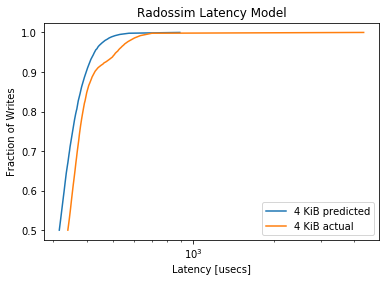

MainProcess pypet INFO     
 Finished single run #126 of 1680 

MainProcess pypet INFO     
 Starting single run #127 of 1680 



minimum predicted latency: 215.035000
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1358, pvalue=9.247930313133883e-81)


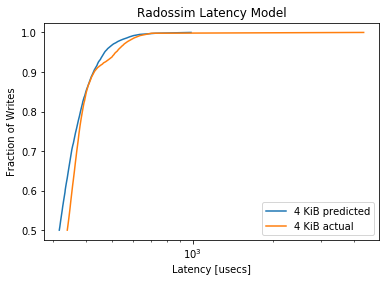

MainProcess pypet INFO     
 Finished single run #127 of 1680 

MainProcess pypet INFO     
 Starting single run #128 of 1680 



minimum predicted latency: 228.991712
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0996, pvalue=1.4091977843589386e-43)


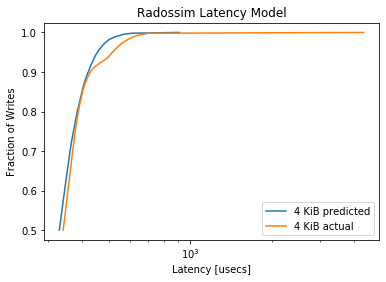

MainProcess pypet INFO     
 Finished single run #128 of 1680 

MainProcess pypet INFO     
 Starting single run #129 of 1680 



minimum predicted latency: 220.832259
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0577, pvalue=6.835931034186044e-15)


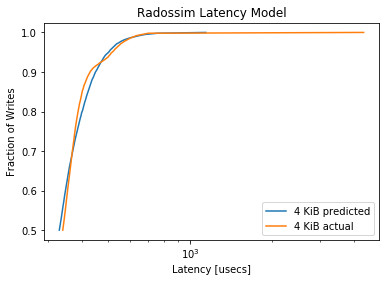

MainProcess pypet INFO     
 Finished single run #129 of 1680 

MainProcess pypet INFO     
 Starting single run #130 of 1680 



minimum predicted latency: 232.845803
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1614, pvalue=4.751650783281221e-114)


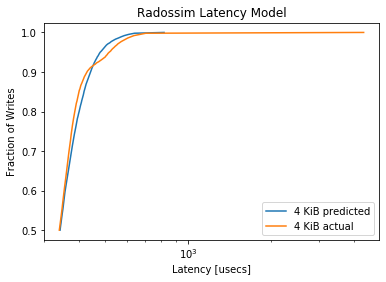

MainProcess pypet INFO     
 Finished single run #130 of 1680 

MainProcess pypet INFO     
 Starting single run #131 of 1680 



minimum predicted latency: 221.772931
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1095, pvalue=1.3368771117892508e-52)


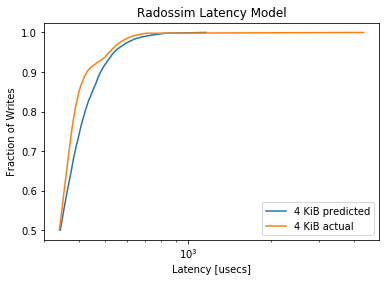

MainProcess pypet INFO     
 Finished single run #131 of 1680 

MainProcess pypet INFO     
 Starting single run #132 of 1680 



minimum predicted latency: 238.749865
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2158, pvalue=2.8989137068833746e-204)


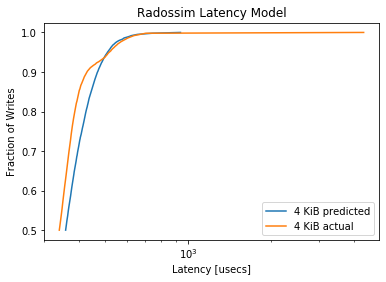

MainProcess pypet INFO     
 Finished single run #132 of 1680 

MainProcess pypet INFO     
 Starting single run #133 of 1680 



minimum predicted latency: 225.778801
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1694, pvalue=1.1957485480810113e-125)


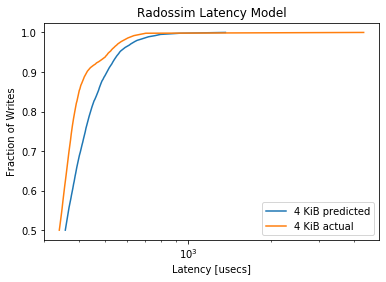

MainProcess pypet INFO     
 Finished single run #133 of 1680 

MainProcess pypet INFO     
 Starting single run #134 of 1680 



minimum predicted latency: 234.080237
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2701, pvalue=3.26e-321)


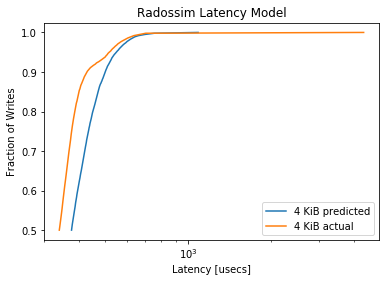

MainProcess pypet INFO     
 Finished single run #134 of 1680 

MainProcess pypet INFO     
 Starting single run #135 of 1680 



minimum predicted latency: 221.827581
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2499, pvalue=1.5929299724850305e-274)


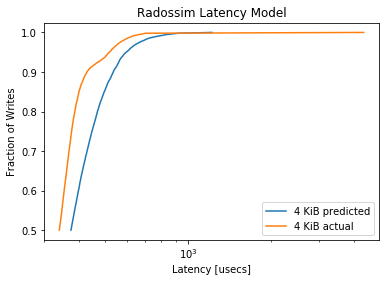

MainProcess pypet INFO     
 Finished single run #135 of 1680 

MainProcess pypet INFO     
 Starting single run #136 of 1680 



minimum predicted latency: 240.632063
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3409, pvalue=0.0)


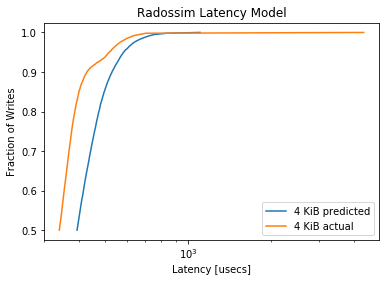

MainProcess pypet INFO     
 Finished single run #136 of 1680 

MainProcess pypet INFO     
 Starting single run #137 of 1680 



minimum predicted latency: 226.864037
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3344, pvalue=0.0)


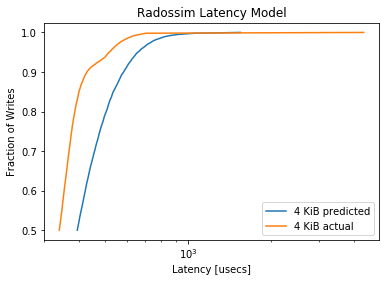

MainProcess pypet INFO     
 Finished single run #137 of 1680 

MainProcess pypet INFO     
 Starting single run #138 of 1680 



minimum predicted latency: 248.456215
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.439, pvalue=0.0)


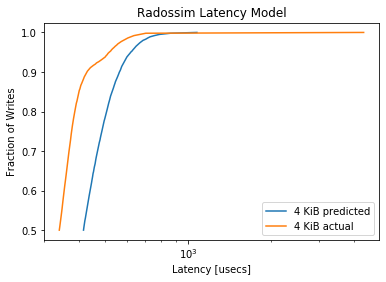

MainProcess pypet INFO     
 Finished single run #138 of 1680 

MainProcess pypet INFO     
 Starting single run #139 of 1680 



minimum predicted latency: 219.837670
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3974, pvalue=0.0)


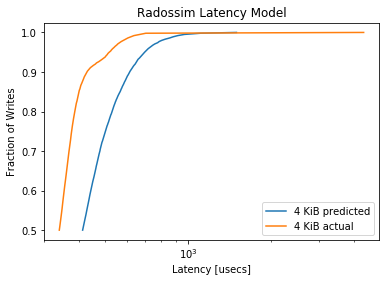

MainProcess pypet INFO     
 Finished single run #139 of 1680 

MainProcess pypet INFO     
 Starting single run #140 of 1680 



minimum predicted latency: 215.514945
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4055, pvalue=0.0)


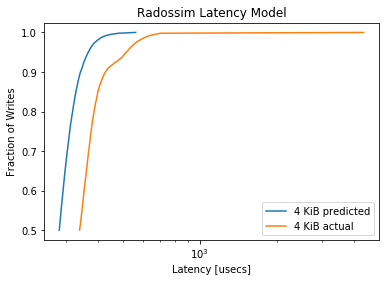

MainProcess pypet INFO     
 Finished single run #140 of 1680 

MainProcess pypet INFO     
 Starting single run #141 of 1680 



minimum predicted latency: 207.869663
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3482, pvalue=0.0)


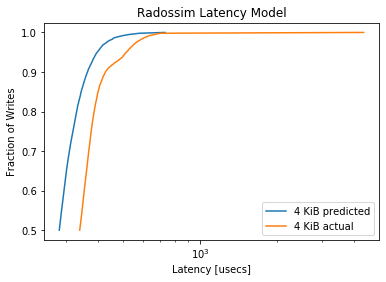

MainProcess pypet INFO     
 Finished single run #141 of 1680 

MainProcess pypet INFO     
 Starting single run #142 of 1680 



minimum predicted latency: 218.050311
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3458, pvalue=0.0)


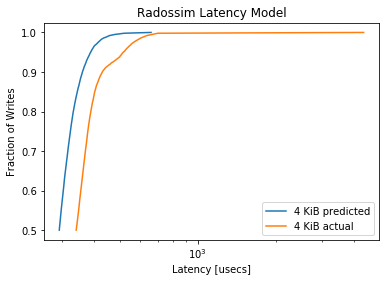

MainProcess pypet INFO     
 Finished single run #142 of 1680 

MainProcess pypet INFO     
 Starting single run #143 of 1680 



minimum predicted latency: 207.023673
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2829, pvalue=1e-323)


MainProcess pypet INFO     
 Finished single run #143 of 1680 

MainProcess pypet INFO     
 Starting single run #144 of 1680 



minimum predicted latency: 215.403889
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.26, pvalue=2.150967497373797e-297)


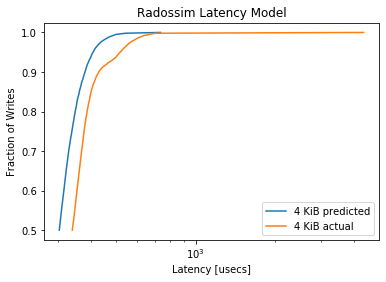

MainProcess pypet INFO     
 Finished single run #144 of 1680 

MainProcess pypet INFO     
 Starting single run #145 of 1680 



minimum predicted latency: 208.704755
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2236, pvalue=2.1458700492543286e-219)


MainProcess pypet INFO     
 Finished single run #145 of 1680 

MainProcess pypet INFO     
 Starting single run #146 of 1680 



minimum predicted latency: 224.373900
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1843, pvalue=8.857124405869549e-149)


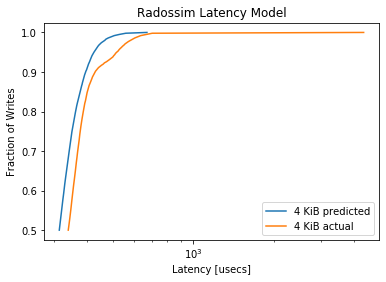

MainProcess pypet INFO     
 Finished single run #146 of 1680 

MainProcess pypet INFO     
 Starting single run #147 of 1680 



minimum predicted latency: 213.112172
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1486, pvalue=1.1195510718685207e-96)


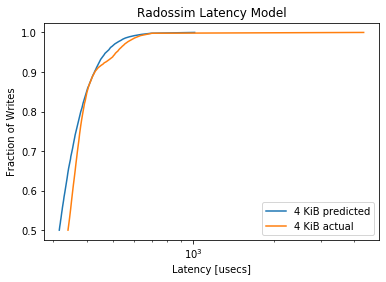

MainProcess pypet INFO     
 Finished single run #147 of 1680 

MainProcess pypet INFO     
 Starting single run #148 of 1680 



minimum predicted latency: 225.560878
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0929, pvalue=5.853524732646717e-38)


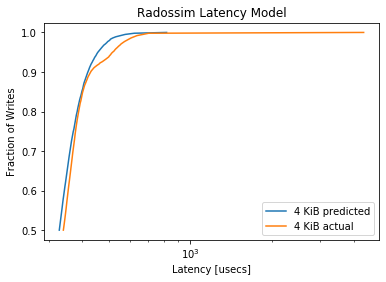

MainProcess pypet INFO     
 Finished single run #148 of 1680 

MainProcess pypet INFO     
 Starting single run #149 of 1680 



minimum predicted latency: 219.382103
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0685, pvalue=8.089130963316147e-21)


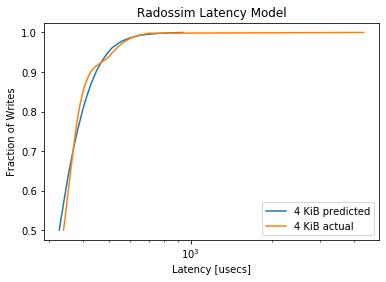

MainProcess pypet INFO     
 Finished single run #149 of 1680 

MainProcess pypet INFO     
 Starting single run #150 of 1680 



minimum predicted latency: 229.726120
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1486, pvalue=1.1195510718685207e-96)


MainProcess pypet INFO     
 Finished single run #150 of 1680 

MainProcess pypet INFO     
 Starting single run #151 of 1680 



minimum predicted latency: 218.790158
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1046, pvalue=5.006509140421456e-48)


MainProcess pypet INFO     
 Finished single run #151 of 1680 

MainProcess pypet INFO     
 Starting single run #152 of 1680 



minimum predicted latency: 231.397977
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2074, pvalue=1.3708476608298687e-188)


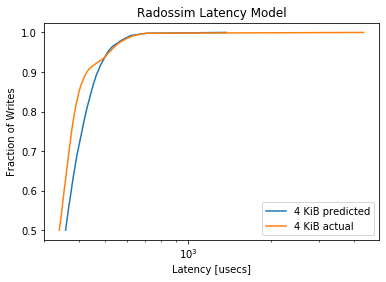

MainProcess pypet INFO     
 Finished single run #152 of 1680 

MainProcess pypet INFO     
 Starting single run #153 of 1680 



minimum predicted latency: 218.613293
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1758, pvalue=2.4338826638695804e-135)


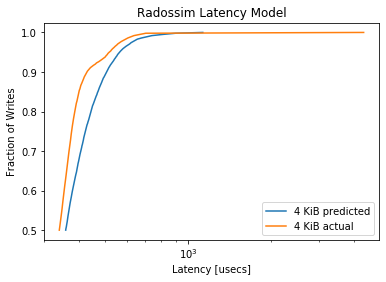

MainProcess pypet INFO     
 Finished single run #153 of 1680 

MainProcess pypet INFO     
 Starting single run #154 of 1680 



minimum predicted latency: 228.820957
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2569, pvalue=2.8367998864267103e-290)


MainProcess pypet INFO     
 Finished single run #154 of 1680 

MainProcess pypet INFO     
 Starting single run #155 of 1680 



minimum predicted latency: 221.405485
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2598, pvalue=6.233055357880596e-297)


MainProcess pypet INFO     
 Finished single run #155 of 1680 

MainProcess pypet INFO     
 Starting single run #156 of 1680 



minimum predicted latency: 229.607419
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3358, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #156 of 1680 

MainProcess pypet INFO     
 Starting single run #157 of 1680 



minimum predicted latency: 223.016420
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3326, pvalue=1e-323)


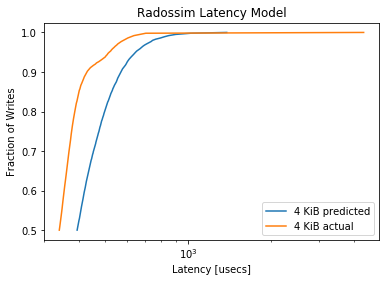

MainProcess pypet INFO     
 Finished single run #157 of 1680 

MainProcess pypet INFO     
 Starting single run #158 of 1680 



minimum predicted latency: 238.319043
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4385, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #158 of 1680 

MainProcess pypet INFO     
 Starting single run #159 of 1680 



minimum predicted latency: 231.056373
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4088, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #159 of 1680 

MainProcess pypet INFO     
 Starting single run #160 of 1680 



minimum predicted latency: 213.408149
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4015, pvalue=0.0)


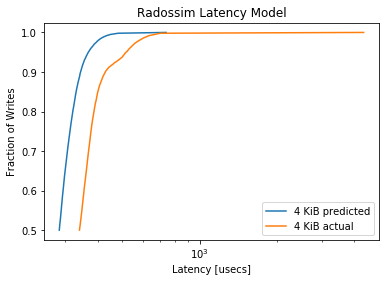

MainProcess pypet INFO     
 Finished single run #160 of 1680 

MainProcess pypet INFO     
 Starting single run #161 of 1680 



minimum predicted latency: 206.362879
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3452, pvalue=0.0)


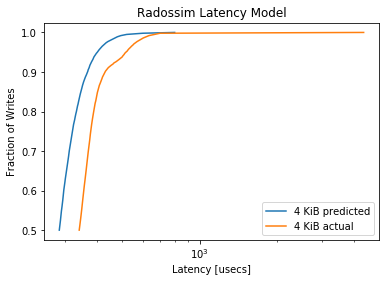

MainProcess pypet INFO     
 Finished single run #161 of 1680 

MainProcess pypet INFO     
 Starting single run #162 of 1680 



minimum predicted latency: 218.135847
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3382, pvalue=0.0)


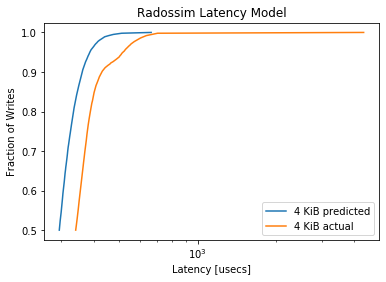

MainProcess pypet INFO     
 Finished single run #162 of 1680 

MainProcess pypet INFO     
 Starting single run #163 of 1680 



minimum predicted latency: 203.825117
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2867, pvalue=1e-323)


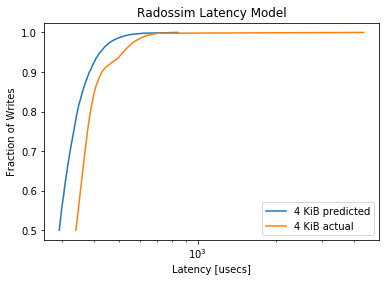

MainProcess pypet INFO     
 Finished single run #163 of 1680 

MainProcess pypet INFO     
 Starting single run #164 of 1680 



minimum predicted latency: 222.517161
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2684, pvalue=3.880027e-317)


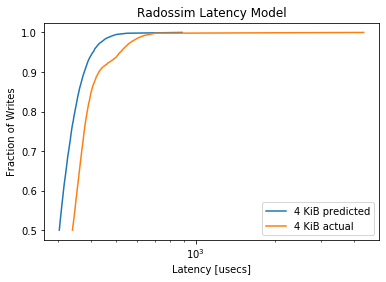

MainProcess pypet INFO     
 Finished single run #164 of 1680 

MainProcess pypet INFO     
 Starting single run #165 of 1680 



minimum predicted latency: 213.032833
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2222, pvalue=1.225343373032172e-216)


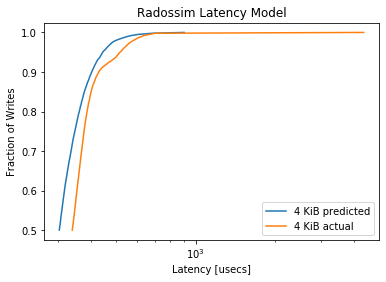

MainProcess pypet INFO     
 Finished single run #165 of 1680 

MainProcess pypet INFO     
 Starting single run #166 of 1680 



minimum predicted latency: 224.176447
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1831, pvalue=7.654135182749848e-147)


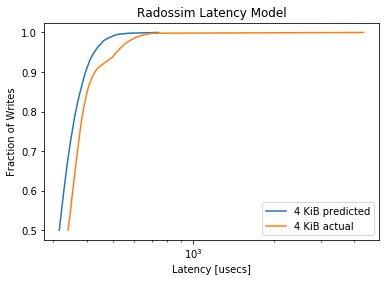

MainProcess pypet INFO     
 Finished single run #166 of 1680 

MainProcess pypet INFO     
 Starting single run #167 of 1680 



minimum predicted latency: 213.041547
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1367, pvalue=7.840183222116839e-82)


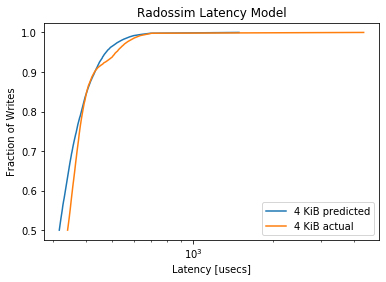

MainProcess pypet INFO     
 Finished single run #167 of 1680 

MainProcess pypet INFO     PROGRESS: Finished  168/1680 runs [==                  ] 10.0%, remaining: 0:10:18
MainProcess pypet INFO     
 Starting single run #168 of 1680 



minimum predicted latency: 224.512674
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0998, pvalue=9.445104075141563e-44)


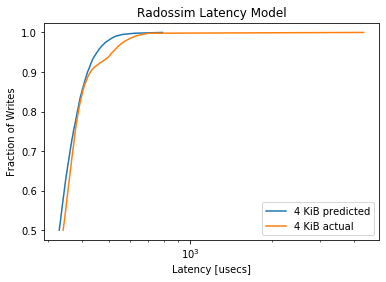

MainProcess pypet INFO     
 Finished single run #168 of 1680 

MainProcess pypet INFO     
 Starting single run #169 of 1680 



minimum predicted latency: 215.171276
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0728, pvalue=1.840335390614857e-23)


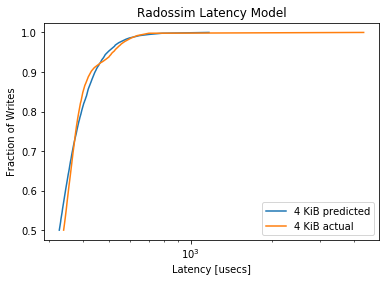

MainProcess pypet INFO     
 Finished single run #169 of 1680 

MainProcess pypet INFO     
 Starting single run #170 of 1680 



minimum predicted latency: 227.618617
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1557, pvalue=3.917354618969243e-106)


MainProcess pypet INFO     
 Finished single run #170 of 1680 

MainProcess pypet INFO     
 Starting single run #171 of 1680 



minimum predicted latency: 214.585168
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1064, pvalue=1.1066409068295807e-49)


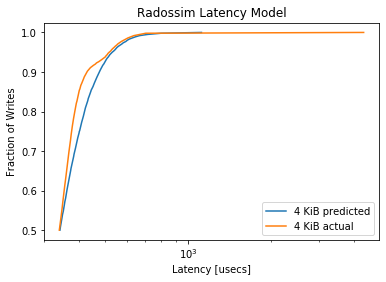

MainProcess pypet INFO     
 Finished single run #171 of 1680 

MainProcess pypet INFO     
 Starting single run #172 of 1680 



minimum predicted latency: 230.693114
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2116, pvalue=2.397776155041578e-196)


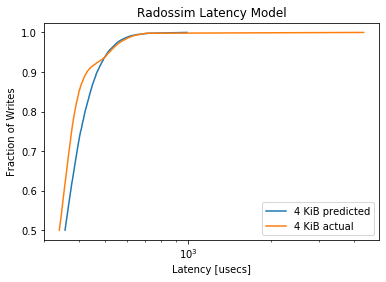

MainProcess pypet INFO     
 Finished single run #172 of 1680 

MainProcess pypet INFO     
 Starting single run #173 of 1680 



minimum predicted latency: 218.429926
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1736, pvalue=5.741979323437544e-132)


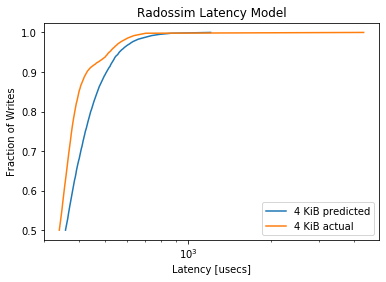

MainProcess pypet INFO     
 Finished single run #173 of 1680 

MainProcess pypet INFO     
 Starting single run #174 of 1680 



minimum predicted latency: 229.222724
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2589, pvalue=7.402752645774571e-295)


MainProcess pypet INFO     
 Finished single run #174 of 1680 

MainProcess pypet INFO     
 Starting single run #175 of 1680 



minimum predicted latency: 222.700136
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2596, pvalue=1.804660687969792e-296)


MainProcess pypet INFO     
 Finished single run #175 of 1680 

MainProcess pypet INFO     
 Starting single run #176 of 1680 



minimum predicted latency: 240.003277
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3466, pvalue=0.0)


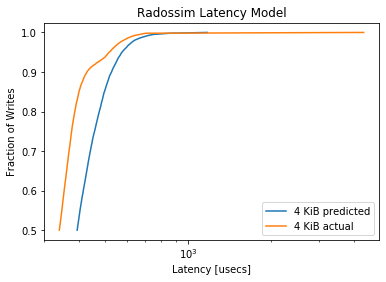

MainProcess pypet INFO     
 Finished single run #176 of 1680 

MainProcess pypet INFO     
 Starting single run #177 of 1680 



minimum predicted latency: 226.035687
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3287, pvalue=1e-323)


MainProcess pypet INFO     
 Finished single run #177 of 1680 

MainProcess pypet INFO     
 Starting single run #178 of 1680 



minimum predicted latency: 253.669000
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4306, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #178 of 1680 

MainProcess pypet INFO     
 Starting single run #179 of 1680 



minimum predicted latency: 231.608544
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4039, pvalue=0.0)


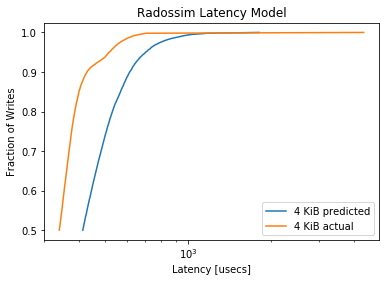

MainProcess pypet INFO     
 Finished single run #179 of 1680 

MainProcess pypet INFO     
 Starting single run #180 of 1680 



minimum predicted latency: 216.016671
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4019, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #180 of 1680 

MainProcess pypet INFO     
 Starting single run #181 of 1680 



minimum predicted latency: 209.562978
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3524, pvalue=0.0)


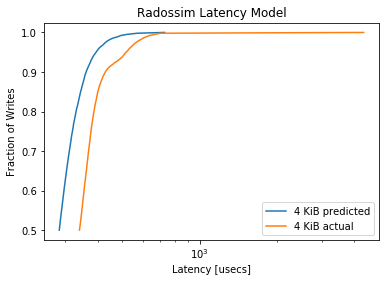

MainProcess pypet INFO     
 Finished single run #181 of 1680 

MainProcess pypet INFO     
 Starting single run #182 of 1680 



minimum predicted latency: 212.780178
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3381, pvalue=0.0)


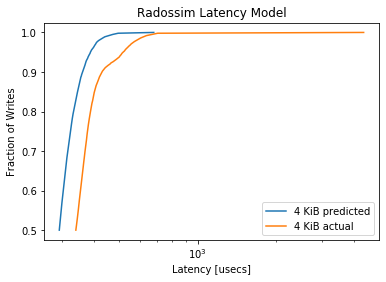

MainProcess pypet INFO     
 Finished single run #182 of 1680 

MainProcess pypet INFO     
 Starting single run #183 of 1680 



minimum predicted latency: 207.884159
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2858, pvalue=1e-323)


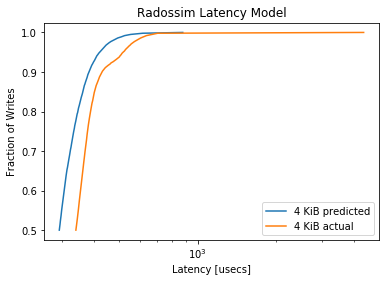

MainProcess pypet INFO     
 Finished single run #183 of 1680 

MainProcess pypet INFO     
 Starting single run #184 of 1680 



minimum predicted latency: 213.157045
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2675, pvalue=5.442200707e-315)


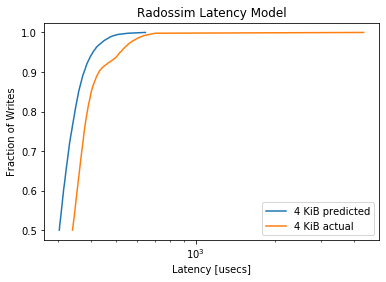

MainProcess pypet INFO     
 Finished single run #184 of 1680 

MainProcess pypet INFO     
 Starting single run #185 of 1680 



minimum predicted latency: 215.118042
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2193, pvalue=5.514645424099267e-211)


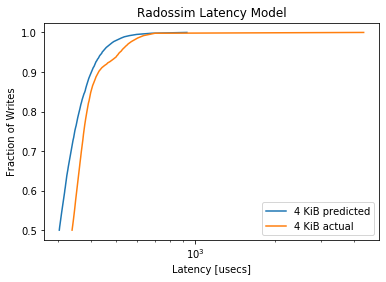

MainProcess pypet INFO     
 Finished single run #185 of 1680 

MainProcess pypet INFO     
 Starting single run #186 of 1680 



minimum predicted latency: 220.683210
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1763, pvalue=4.108794584496933e-136)


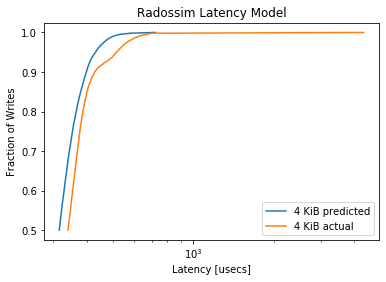

MainProcess pypet INFO     
 Finished single run #186 of 1680 

MainProcess pypet INFO     
 Starting single run #187 of 1680 



minimum predicted latency: 209.024277
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1516, pvalue=1.2829439338748125e-100)


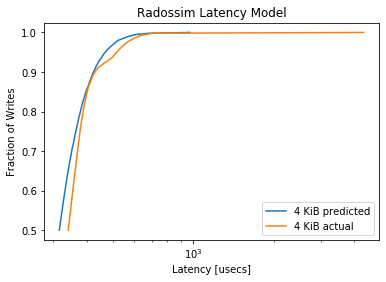

MainProcess pypet INFO     
 Finished single run #187 of 1680 

MainProcess pypet INFO     
 Starting single run #188 of 1680 



minimum predicted latency: 223.264089
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0951, pvalue=9.245844712152985e-40)


MainProcess pypet INFO     
 Finished single run #188 of 1680 

MainProcess pypet INFO     
 Starting single run #189 of 1680 



minimum predicted latency: 213.426579
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0728, pvalue=1.840335390614857e-23)


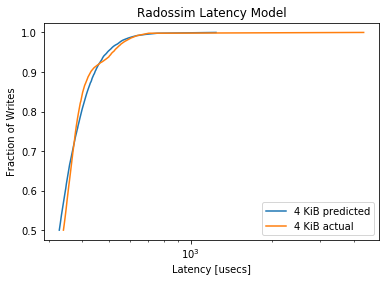

MainProcess pypet INFO     
 Finished single run #189 of 1680 

MainProcess pypet INFO     
 Starting single run #190 of 1680 



minimum predicted latency: 225.481355
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1502, pvalue=9.061844307365734e-99)


MainProcess pypet INFO     
 Finished single run #190 of 1680 

MainProcess pypet INFO     
 Starting single run #191 of 1680 



minimum predicted latency: 214.163776
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1043, pvalue=9.390526036256673e-48)


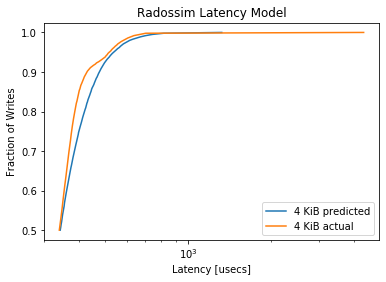

MainProcess pypet INFO     
 Finished single run #191 of 1680 

MainProcess pypet INFO     
 Starting single run #192 of 1680 



minimum predicted latency: 226.066021
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2154, pvalue=1.6718928725640273e-203)


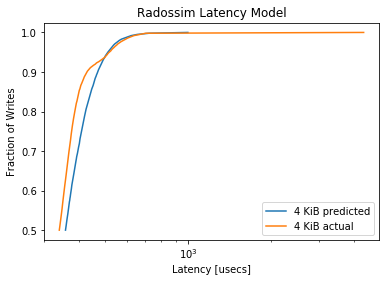

MainProcess pypet INFO     
 Finished single run #192 of 1680 

MainProcess pypet INFO     
 Starting single run #193 of 1680 



minimum predicted latency: 220.327524
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1666, pvalue=1.5935985715067937e-121)


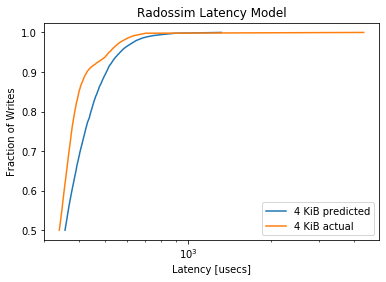

MainProcess pypet INFO     
 Finished single run #193 of 1680 

MainProcess pypet INFO     
 Starting single run #194 of 1680 



minimum predicted latency: 230.542469
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2574, pvalue=2.0438951131242388e-291)


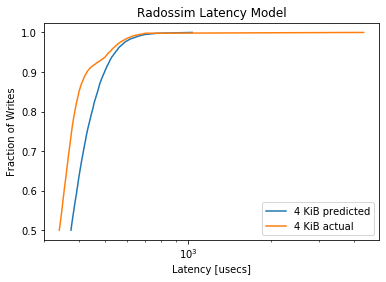

MainProcess pypet INFO     
 Finished single run #194 of 1680 

MainProcess pypet INFO     
 Starting single run #195 of 1680 



minimum predicted latency: 222.683330
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2544, pvalue=1.348404675438394e-284)


MainProcess pypet INFO     
 Finished single run #195 of 1680 

MainProcess pypet INFO     
 Starting single run #196 of 1680 



minimum predicted latency: 236.039967
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3435, pvalue=0.0)


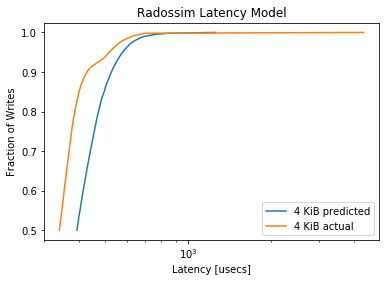

MainProcess pypet INFO     
 Finished single run #196 of 1680 

MainProcess pypet INFO     
 Starting single run #197 of 1680 



minimum predicted latency: 219.243374
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3187, pvalue=1e-323)


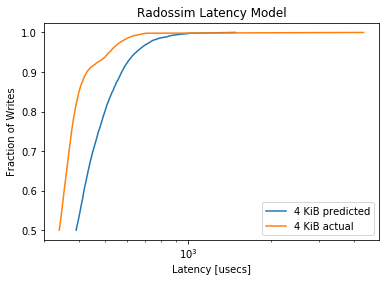

MainProcess pypet INFO     
 Finished single run #197 of 1680 

MainProcess pypet INFO     
 Starting single run #198 of 1680 



minimum predicted latency: 238.569999
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4324, pvalue=0.0)


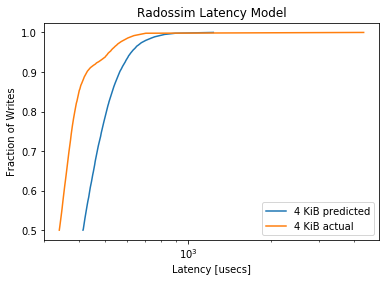

MainProcess pypet INFO     
 Finished single run #198 of 1680 

MainProcess pypet INFO     
 Starting single run #199 of 1680 



minimum predicted latency: 231.882137
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4001, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #199 of 1680 

MainProcess pypet INFO     
 Starting single run #200 of 1680 



minimum predicted latency: 210.795896
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4006, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #200 of 1680 

MainProcess pypet INFO     
 Starting single run #201 of 1680 



minimum predicted latency: 207.224262
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3427, pvalue=0.0)


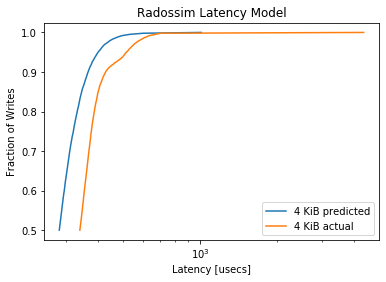

MainProcess pypet INFO     
 Finished single run #201 of 1680 

MainProcess pypet INFO     
 Starting single run #202 of 1680 



minimum predicted latency: 214.181700
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3478, pvalue=0.0)


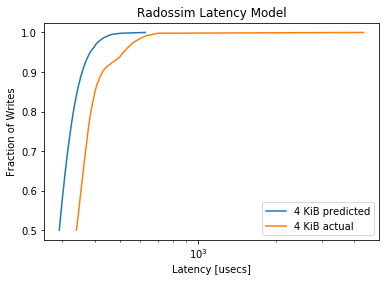

MainProcess pypet INFO     
 Finished single run #202 of 1680 

MainProcess pypet INFO     
 Starting single run #203 of 1680 



minimum predicted latency: 205.453971
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2931, pvalue=1e-323)


MainProcess pypet INFO     
 Finished single run #203 of 1680 

MainProcess pypet INFO     
 Starting single run #204 of 1680 



minimum predicted latency: 216.447242
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2715, pvalue=1e-323)


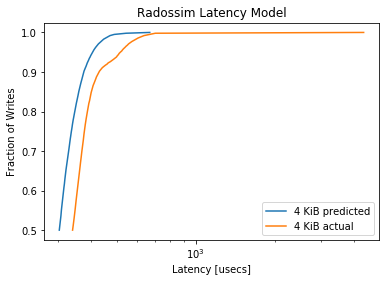

MainProcess pypet INFO     
 Finished single run #204 of 1680 

MainProcess pypet INFO     
 Starting single run #205 of 1680 



minimum predicted latency: 210.360906
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2297, pvalue=1.2917426719724788e-231)


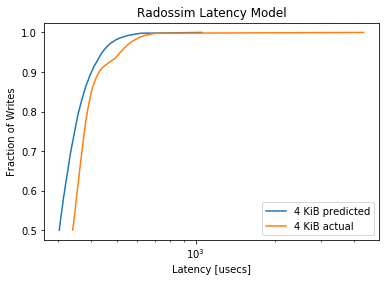

MainProcess pypet INFO     
 Finished single run #205 of 1680 

MainProcess pypet INFO     
 Starting single run #206 of 1680 



minimum predicted latency: 224.870313
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1899, pvalue=5.476821358816788e-158)


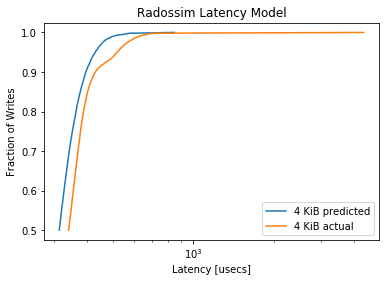

MainProcess pypet INFO     
 Finished single run #206 of 1680 

MainProcess pypet INFO     
 Starting single run #207 of 1680 



minimum predicted latency: 211.600679
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1568, pvalue=1.2241980418299461e-107)


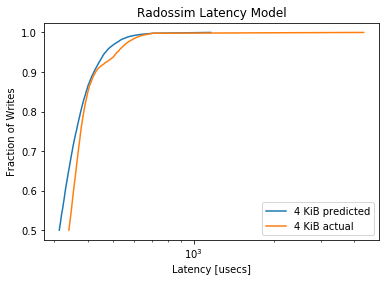

MainProcess pypet INFO     
 Finished single run #207 of 1680 

MainProcess pypet INFO     
 Starting single run #208 of 1680 



minimum predicted latency: 217.301360
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0882, pvalue=2.9783483994507045e-34)


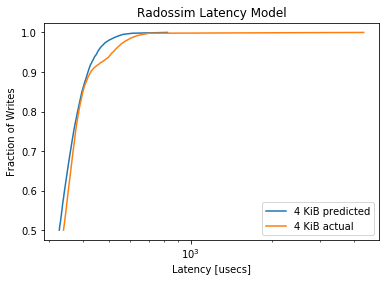

MainProcess pypet INFO     
 Finished single run #208 of 1680 

MainProcess pypet INFO     
 Starting single run #209 of 1680 



minimum predicted latency: 208.804920
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0738, pvalue=4.23749565180438e-24)


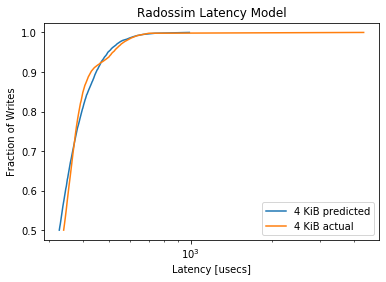

MainProcess pypet INFO     
 Finished single run #209 of 1680 

MainProcess pypet INFO     
 Starting single run #210 of 1680 



minimum predicted latency: 220.163747
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1449, pvalue=6.299836157817571e-92)


MainProcess pypet INFO     
 Finished single run #210 of 1680 

MainProcess pypet INFO     
 Starting single run #211 of 1680 



minimum predicted latency: 214.806344
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.093, pvalue=4.857943536124278e-38)


MainProcess pypet INFO     
 Finished single run #211 of 1680 

MainProcess pypet INFO     
 Starting single run #212 of 1680 



minimum predicted latency: 226.351454
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2051, pvalue=2.0754321377061077e-184)


MainProcess pypet INFO     
 Finished single run #212 of 1680 

MainProcess pypet INFO     
 Starting single run #213 of 1680 



minimum predicted latency: 212.516942
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1656, pvalue=4.555364086917128e-120)


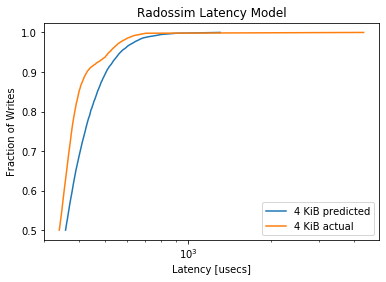

MainProcess pypet INFO     
 Finished single run #213 of 1680 

MainProcess pypet INFO     
 Starting single run #214 of 1680 



minimum predicted latency: 239.911753
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2542, pvalue=3.81479491631945e-284)


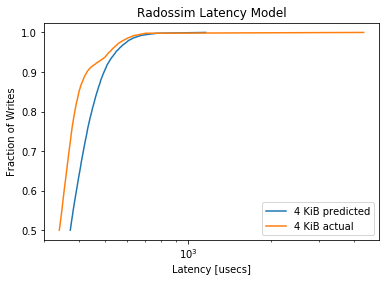

MainProcess pypet INFO     
 Finished single run #214 of 1680 

MainProcess pypet INFO     
 Starting single run #215 of 1680 



minimum predicted latency: 213.595907
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2493, pvalue=3.396225485777185e-273)


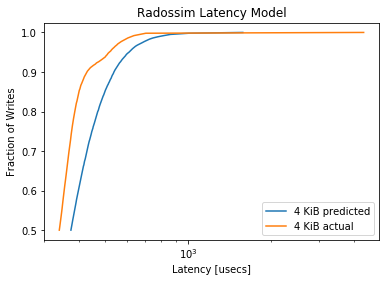

MainProcess pypet INFO     
 Finished single run #215 of 1680 

MainProcess pypet INFO     
 Starting single run #216 of 1680 



minimum predicted latency: 235.071317
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3382, pvalue=0.0)


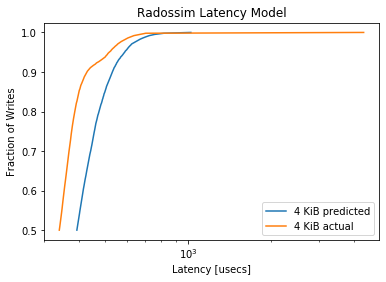

MainProcess pypet INFO     
 Finished single run #216 of 1680 

MainProcess pypet INFO     
 Starting single run #217 of 1680 



minimum predicted latency: 220.502798
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3238, pvalue=1e-323)


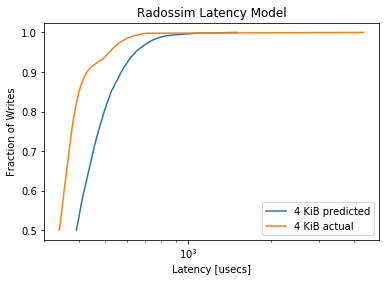

MainProcess pypet INFO     
 Finished single run #217 of 1680 

MainProcess pypet INFO     
 Starting single run #218 of 1680 



minimum predicted latency: 241.977056
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.433, pvalue=0.0)


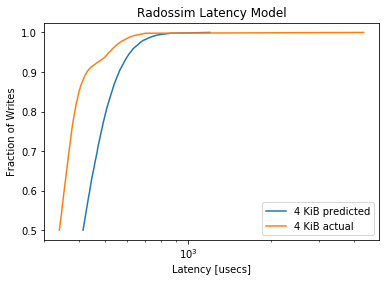

MainProcess pypet INFO     
 Finished single run #218 of 1680 

MainProcess pypet INFO     
 Starting single run #219 of 1680 



minimum predicted latency: 225.596239
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4077, pvalue=0.0)


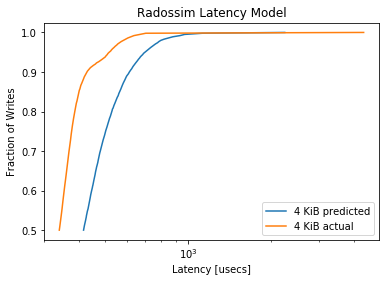

MainProcess pypet INFO     
 Finished single run #219 of 1680 

MainProcess pypet INFO     
 Starting single run #220 of 1680 



minimum predicted latency: 214.830327
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4087, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #220 of 1680 

MainProcess pypet INFO     
 Starting single run #221 of 1680 



minimum predicted latency: 203.674345
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3509, pvalue=0.0)


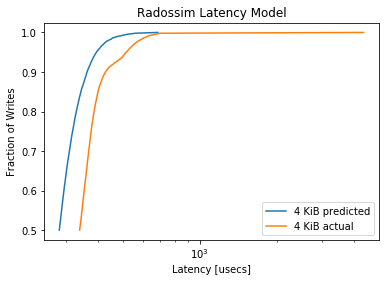

MainProcess pypet INFO     
 Finished single run #221 of 1680 

MainProcess pypet INFO     
 Starting single run #222 of 1680 



minimum predicted latency: 213.993151
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3453, pvalue=0.0)


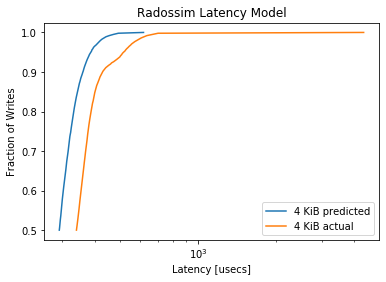

MainProcess pypet INFO     
 Finished single run #222 of 1680 

MainProcess pypet INFO     
 Starting single run #223 of 1680 



minimum predicted latency: 210.131102
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2909, pvalue=1e-323)


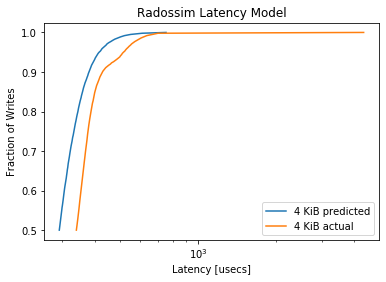

MainProcess pypet INFO     
 Finished single run #223 of 1680 

MainProcess pypet INFO     
 Starting single run #224 of 1680 



minimum predicted latency: 219.292585
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2725, pvalue=1e-323)


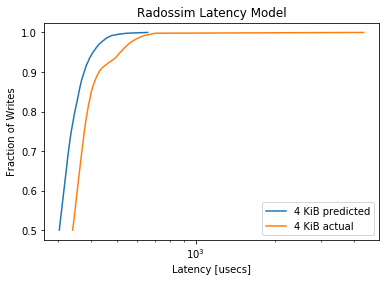

MainProcess pypet INFO     
 Finished single run #224 of 1680 

MainProcess pypet INFO     
 Starting single run #225 of 1680 



minimum predicted latency: 205.145203
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.234, pvalue=1.9579949269024177e-240)


MainProcess pypet INFO     
 Finished single run #225 of 1680 

MainProcess pypet INFO     
 Starting single run #226 of 1680 



minimum predicted latency: 220.756358
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1891, pvalue=1.1785602233953768e-156)


MainProcess pypet INFO     
 Finished single run #226 of 1680 

MainProcess pypet INFO     
 Starting single run #227 of 1680 



minimum predicted latency: 207.329294
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1462, pvalue=1.3936599565868847e-93)


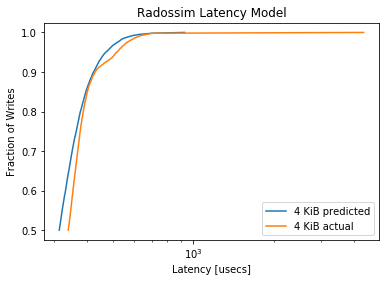

MainProcess pypet INFO     
 Finished single run #227 of 1680 

MainProcess pypet INFO     
 Starting single run #228 of 1680 



minimum predicted latency: 220.955464
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0936, pvalue=1.580602185391697e-38)


MainProcess pypet INFO     
 Finished single run #228 of 1680 

MainProcess pypet INFO     
 Starting single run #229 of 1680 



minimum predicted latency: 210.765996
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0781, pvalue=6.096672975932883e-27)


MainProcess pypet INFO     
 Finished single run #229 of 1680 

MainProcess pypet INFO     
 Starting single run #230 of 1680 



minimum predicted latency: 218.878961
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1463, pvalue=1.0380414123125552e-93)


MainProcess pypet INFO     
 Finished single run #230 of 1680 

MainProcess pypet INFO     
 Starting single run #231 of 1680 



minimum predicted latency: 217.251719
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1083, pvalue=1.843424997171752e-51)


MainProcess pypet INFO     
 Finished single run #231 of 1680 

MainProcess pypet INFO     
 Starting single run #232 of 1680 



minimum predicted latency: 229.424480
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2031, pvalue=8.184758685314227e-181)


MainProcess pypet INFO     
 Finished single run #232 of 1680 

MainProcess pypet INFO     
 Starting single run #233 of 1680 



minimum predicted latency: 219.950795
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1651, pvalue=2.4168300383777408e-119)


MainProcess pypet INFO     
 Finished single run #233 of 1680 

MainProcess pypet INFO     
 Starting single run #234 of 1680 



minimum predicted latency: 231.345257
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.258, pvalue=8.640619513491106e-293)


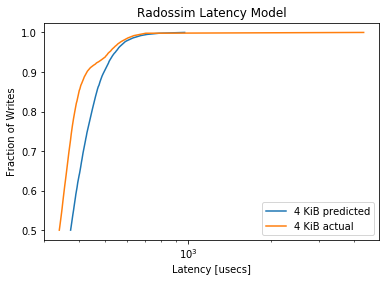

MainProcess pypet INFO     
 Finished single run #234 of 1680 

MainProcess pypet INFO     
 Starting single run #235 of 1680 



minimum predicted latency: 217.095244
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2465, pvalue=4.875254557808692e-267)


MainProcess pypet INFO     
 Finished single run #235 of 1680 

MainProcess pypet INFO     
 Starting single run #236 of 1680 



minimum predicted latency: 235.733898
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3348, pvalue=0.0)


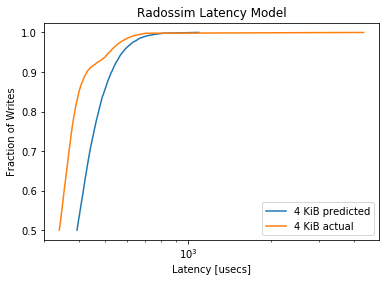

MainProcess pypet INFO     
 Finished single run #236 of 1680 

MainProcess pypet INFO     
 Starting single run #237 of 1680 



minimum predicted latency: 225.621257
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3195, pvalue=1e-323)


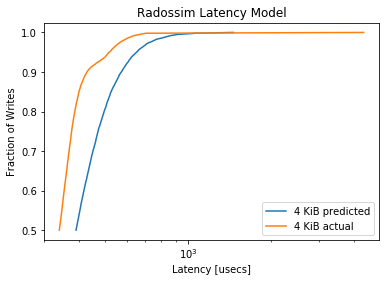

MainProcess pypet INFO     
 Finished single run #237 of 1680 

MainProcess pypet INFO     
 Starting single run #238 of 1680 



minimum predicted latency: 242.611137
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4271, pvalue=0.0)


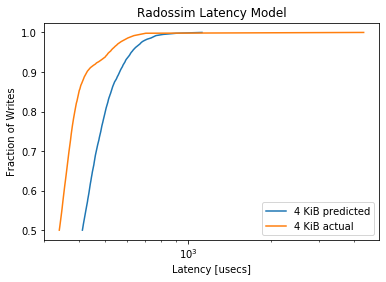

MainProcess pypet INFO     
 Finished single run #238 of 1680 

MainProcess pypet INFO     
 Starting single run #239 of 1680 



minimum predicted latency: 231.216803
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4088, pvalue=0.0)


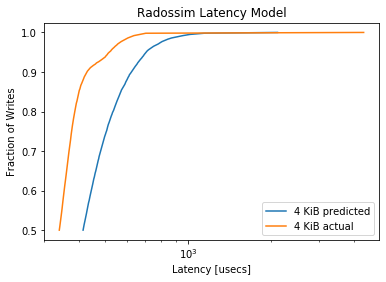

MainProcess pypet INFO     
 Finished single run #239 of 1680 

MainProcess pypet INFO     
 Starting single run #240 of 1680 



minimum predicted latency: 213.363912
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.4006, pvalue=0.0)


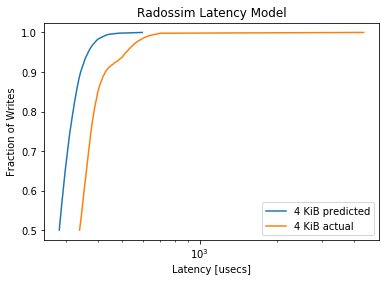

MainProcess pypet INFO     
 Finished single run #240 of 1680 

MainProcess pypet INFO     
 Starting single run #241 of 1680 



minimum predicted latency: 208.252623
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3484, pvalue=0.0)


MainProcess pypet INFO     
 Finished single run #241 of 1680 

MainProcess pypet INFO     
 Starting single run #242 of 1680 



minimum predicted latency: 216.055400
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.344, pvalue=0.0)


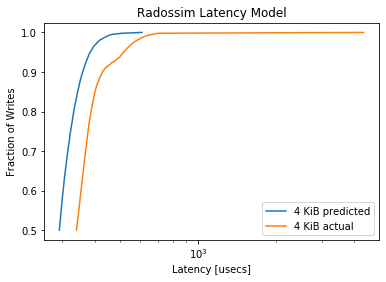

MainProcess pypet INFO     
 Finished single run #242 of 1680 

MainProcess pypet INFO     
 Starting single run #243 of 1680 



minimum predicted latency: 205.610252
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2893, pvalue=1e-323)


MainProcess pypet INFO     
 Finished single run #243 of 1680 

MainProcess pypet INFO     
 Starting single run #244 of 1680 



minimum predicted latency: 216.541350
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2697, pvalue=2.981e-320)


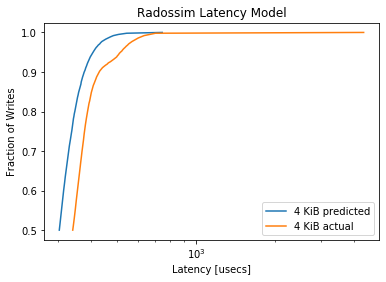

MainProcess pypet INFO     
 Finished single run #244 of 1680 

MainProcess pypet INFO     
 Starting single run #245 of 1680 



minimum predicted latency: 209.657614
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2302, pvalue=1.2427565019089056e-232)


MainProcess pypet INFO     
 Finished single run #245 of 1680 

MainProcess pypet INFO     
 Starting single run #246 of 1680 



minimum predicted latency: 215.603610
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1897, pvalue=1.1810680652684967e-157)


MainProcess pypet INFO     
 Finished single run #246 of 1680 

MainProcess pypet INFO     
 Starting single run #247 of 1680 



minimum predicted latency: 210.916459
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1516, pvalue=1.2829439338748125e-100)


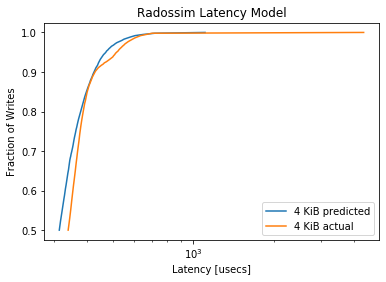

MainProcess pypet INFO     
 Finished single run #247 of 1680 

MainProcess pypet INFO     
 Starting single run #248 of 1680 



minimum predicted latency: 220.579213
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0928, pvalue=7.051716468595235e-38)


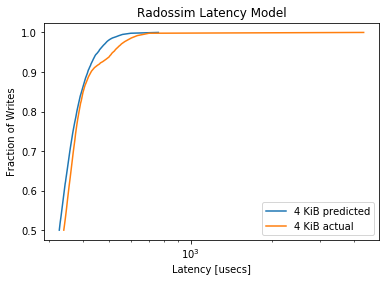

MainProcess pypet INFO     
 Finished single run #248 of 1680 

MainProcess pypet INFO     
 Starting single run #249 of 1680 



minimum predicted latency: 211.705573
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0735, pvalue=6.597243091950528e-24)


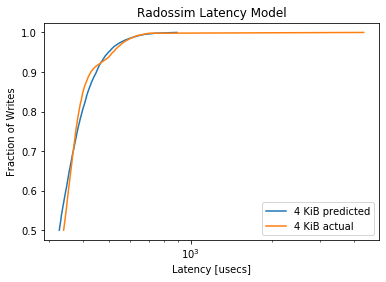

MainProcess pypet INFO     
 Finished single run #249 of 1680 

MainProcess pypet INFO     
 Starting single run #250 of 1680 



minimum predicted latency: 223.235923
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1463, pvalue=1.0380414123125552e-93)


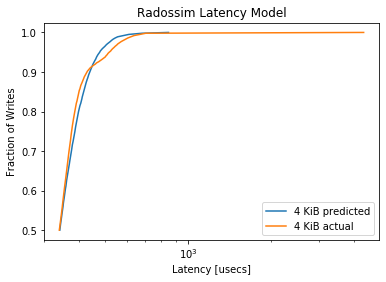

MainProcess pypet INFO     
 Finished single run #250 of 1680 

MainProcess pypet INFO     
 Starting single run #251 of 1680 



minimum predicted latency: 214.523742
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.0941, pvalue=6.166727349642842e-39)


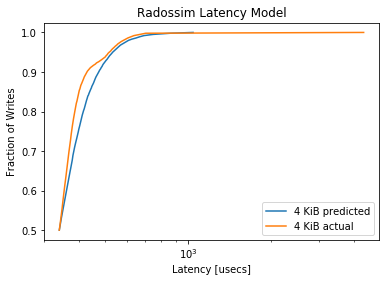

MainProcess pypet INFO     
 Finished single run #251 of 1680 

MainProcess pypet INFO     PROGRESS: Finished  252/1680 runs [===                 ] 15.0%, remaining: 0:09:23
MainProcess pypet INFO     
 Starting single run #252 of 1680 



minimum predicted latency: 224.377422
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2052, pvalue=1.368869072571013e-184)


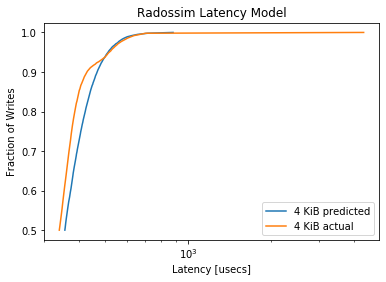

MainProcess pypet INFO     
 Finished single run #252 of 1680 

MainProcess pypet INFO     
 Starting single run #253 of 1680 



minimum predicted latency: 217.697936
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.175, pvalue=4.14739768964933e-134)


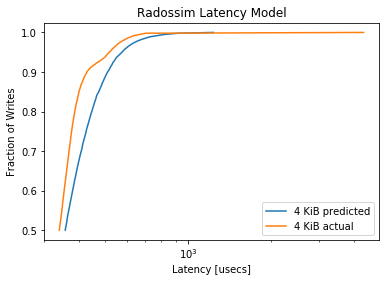

MainProcess pypet INFO     
 Finished single run #253 of 1680 

MainProcess pypet INFO     
 Starting single run #254 of 1680 



minimum predicted latency: 234.521605
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2553, pvalue=1.238208098389354e-286)


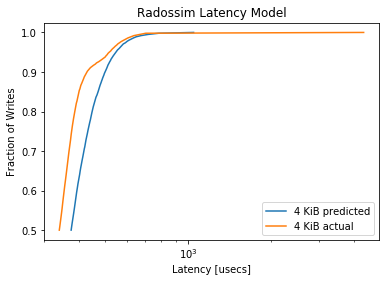

MainProcess pypet INFO     
 Finished single run #254 of 1680 

MainProcess pypet INFO     
 Starting single run #255 of 1680 



minimum predicted latency: 219.461166
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.2416, pvalue=1.9425044233707777e-256)


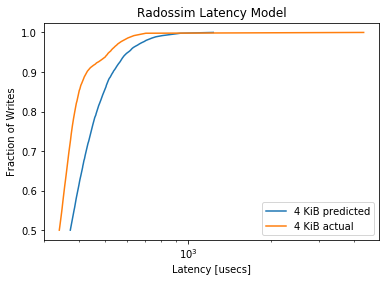

MainProcess pypet INFO     
 Finished single run #255 of 1680 

MainProcess pypet INFO     
 Starting single run #256 of 1680 

MainProcess pypet ERROR    ERROR occurred during a single run! 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/pypet/environment.py", line 259, in _sigint_handling_single_run
    return _single_run(kwargs)
  File "/usr/local/lib/python3.7/site-packages/pypet/environment.py", line 314, in _single_run
    result = runfunc(traj, *runargs, **kwrunparams)
  File "<ipython-input-32-278a4ab4508a>", line 81, in exploreVal
    z = validateMod(4096, lgMult, lgAdd, traj.smMult, traj.smAdd, traj.mu, traj.sigma)
  File "<ipython-input-32-278a4ab4508a>", line 69, in validateMod
    fig, ax = plt.subplots()
  File "/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py", line 1212, in subplots
    gridspec_kw=gridspec_kw)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/figure.py", line 1575, in subplots
    axarr[row, col] = 

minimum predicted latency: 239.287595
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.3396, pvalue=0.0)


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import math
from pypet import Environment, cartesian_product
from numpy import arange

# Add path for modules in scripts/ so this notebook works
# without the context created by main.workflow
import sys
sys.path.append('../..')

import scripts.radossim as sim

def validateMod(reqSize, lgMult, lgAdd, smMult, smAdd, mu, sigma, start=500):
    
    # Create 10,000 latModel latency predictions for size = 4KiB 
    pred_samples = []
    for j in range(10000):
        pred_samples.append(sim.latModel(reqSize, lgMult, lgAdd, smMult, smAdd, mu, sigma))
    pred_samples.sort()
    pred_min = pred_samples[0]
    print('minimum predicted latency: %f' % pred_min)

    # Create percentile curve for latency predictions
    pred_x = []
    y = []
    for i in range(start, 1000, 3):
        pred_x.append(pred_samples[int(i/1000. * len(msmts))])
        y.append(i/1000.)
    pred_x.append(pred_samples[-1])
    y.append(1.0)

    # Create percentile curve for actual latency measurements
    fd = open('BlueStore/batch01/dump_kv_sync_lat_vec-%d.csv' % reqSize)

    # Skip the title and the first 1000 measurements
    for i in range(1001):
        fd.readline()
    
    # Collect 10000 measurements
    act_samples = []
    for i in range(10000):
        lat = fd.readline()
        try:
            lat = float(lat.strip())
        except ValueError:
            continue
        # assume these are seconds -- convert to microseconds
        act_samples.append(lat * 10**6)
    act_samples.sort()
    act_min = act_samples[0]
    print('minimum actual latency: %f' % act_min)

    act_x = []
    for i in range(start, 1000, 3):
        act_x.append(act_samples[int(i/1000. * len(msmts))])
    act_x.append(act_samples[-1])
    
    # KS test
    ks_test = ks_2samp(pred_samples, act_samples)
    print('KS Test:', ks_test)
    '''print('critical values (alpha, value):', 
          (0.05, 1.358 * math.sqrt((2 * 10000)/(10000**2))),
          (0.01, 1.628 * math.sqrt((2 * 10000)/(10000**2))))
    '''

    # Plot both curves
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    ax.plot(pred_x, y, label='%d KiB predicted' % (reqSize / 1024))
    ax.plot(act_x, y, label='%d KiB actual' % (reqSize / 1024))

    ax.set(xlabel='Latency [usecs]', ylabel='Fraction of Writes', title='Radossim Latency Model')
    plt.legend()
    plt.show()
    
    return ks_test[0]

def exploreVal(traj):
    z = validateMod(4096, lgMult, lgAdd, traj.smMult, traj.smAdd, traj.mu, traj.sigma)
    traj.f_add_result('z',z, comment="fitting result")
    
env = Environment(trajectory='ks-test',filename='./HDF/ks-test.hdf5',
                  file_title='ks-test',
                  comment='ks-test',
                  large_overview_tables=True,overwrite_file=True)

traj = env.trajectory
traj.f_add_parameter('smMult', smMult, comment="smMult")
traj.f_add_parameter('smAdd', smAdd, comment="smAdd")                     
traj.f_add_parameter('mu', mu, comment="mu")
traj.f_add_parameter('sigma', sigma, comment="sigma")                   

traj.f_explore(cartesian_product({'smMult':[62.36], 'smAdd':arange(4998.0,5831.0,10.0).tolist(), 'mu':arange(4.5,5.5,0.1).tolist(), 'sigma':arange(0.4,0.6, 0.1).tolist()}))
env.run(exploreVal)
env.disable_logging()
#(pred_min, act_min, ks_test) = validateMod(4096, lgMult, lgAdd, smMult, smAdd, mu, sigma)

In [315]:
validateMod(4096, lgMult, lgAdd, smMult, smAdd * 692, 5, .5, start=100)

minimum predicted latency: 195.154449
minimum actual latency: 200.787000
KS Test: Ks_2sampResult(statistic=0.1106, pvalue=1.175975636161241e-53)
critical values (alpha, value): (0.05, 0.019205020177026633) (0.01, 0.023023396795433988)


(195.15444919672456,
 200.78699999999998,
 Ks_2sampResult(statistic=0.1106, pvalue=1.175975636161241e-53))